## Predicting Member Churn

### Data Pre-processing

#### First let's import all the necessary packages.

In [1]:
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#importing the required library
import pandas as pd
import numpy as np

#importing the required library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# To split dataset into training set and test set
from sklearn.model_selection import train_test_split

# To implement feature scaling
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [ ]:
# To implement Logistic Regression
from sklearn.linear_model import LogisticRegression

# To implement Extra Tree
from sklearn.ensemble import ExtraTreesClassifier

# To implement Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# To implement Decision Tree
from sklearn.tree import DecisionTreeClassifier

# To implement Logistic Regression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# To implement stochastic gradient descent
from sklearn.linear_model import SGDClassifier

# To implement Nueral Network
import keras 
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To model SVM 
from sklearn.svm import SVC

#To implement Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [2]:
# To implement cross validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# To calculate the accuracy score of the model
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# To implement confusion matrix
from sklearn.metrics import confusion_matrix

# To print the classification report
from sklearn.metrics import classification_report

# To implement K-fold validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score



In [ ]:
# To build model report
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import plotly.figure_factory as ff
from pylab import *
import plotly.offline as py
py.init_notebook_mode(connected=True)
      
# To implement AUC Curve
from sklearn.metrics import roc_curve

In [3]:
#loading the csv 
df_member = pd.read_csv('MBRChurnModel_FirstYear_MSK.csv')

In [4]:
#looking at the shape of the dataframe
df_member.shape

(120450, 22)

#### Our dataset has 120450 rows and 22 columns. 

In [5]:
#looking at the data types of different columns
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120450 entries, 0 to 120449
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   RENEW           120450 non-null  object 
 1   A2ACCIPK        120450 non-null  int64  
 2   A2ACCTYP        120450 non-null  int64  
 3   M2EXCFLG        120450 non-null  object 
 4   B2BUSTYP        120450 non-null  int64  
 5   F2HOMRGN        120450 non-null  object 
 6   F2HOMFCY        120450 non-null  int64  
 7   AGE             120450 non-null  int64  
 8   TENURE          120450 non-null  int64  
 9   ZIPCODE         120450 non-null  int64  
 10  MBRCOUNT        120450 non-null  int64  
 11  DISTANCE        120450 non-null  float64
 12  EARLYFAREWELL   120450 non-null  int64  
 13  HOMEFCTYCHANGE  120450 non-null  object 
 14  RECENTMOVING    120450 non-null  object 
 15  SHOP1YR         120450 non-null  float64
 16  SHOP6M          120450 non-null  float64
 17  SHOP3M    

In [6]:
#looking at the data in the dataframe
df_member.head()

,RENEW,A2ACCIPK,A2ACCTYP,M2EXCFLG,B2BUSTYP,F2HOMRGN,F2HOMFCY,AGE,TENURE,ZIPCODE,...,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,N,280928,1,N,0,NE,1078,42,1,20715,...,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,N,280100,1,N,0,BO,847,61,1,77346,...,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,N,279886,1,N,0,BO,847,52,1,91024,...,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,N,279912,1,N,0,SE,185,32,1,32789,...,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,N,279896,1,E,0,BA,472,46,1,93960,...,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


In [7]:
#looking at the statistics
df_member.describe()

,A2ACCIPK,A2ACCTYP,B2BUSTYP,F2HOMFCY,AGE,TENURE,ZIPCODE,MBRCOUNT,DISTANCE,EARLYFAREWELL,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
count,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000,1.204500e+05,1.204500e+05,120450.000000,120450.000000,120450.000000,120450.000000,120450.000000
mean,295631.624956,1.053375,313.801586,670.843105,43.218995,0.999759,60637.309215,1.796920,10.401755,75.186966,2.504813e+03,1.218073e+03,582.422562,0.557166,1.624577,2.038110,3.496129
std,6662.398560,0.224781,1544.622982,394.272373,14.528025,0.015515,31336.866002,0.452599,17.360965,92.509452,9.251164e+03,5.380396e+03,2711.670272,1.612540,2.363750,2.562252,2.238181
min,3486.000000,1.000000,0.000000,1.000000,19.000000,0.000000,601.000000,1.000000,0.116892,10.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,296520.000000,1.000000,0.000000,346.000000,32.000000,1.000000,33024.250000,2.000000,3.057767,16.000000,6.920000e+02,1.810000e+02,29.000000,0.000000,0.000000,0.000000,2.000000
50%,296848.000000,1.000000,0.000000,660.000000,42.000000,1.000000,64111.000000,2.000000,5.226190,30.000000,1.588000e+03,6.570000e+02,291.000000,0.000000,0.013650,1.000000,3.000000
75%,297172.000000,1.000000,0.000000,1074.000000,53.000000,1.000000,91770.000000,2.000000,9.896362,92.000000,3.075000e+03,1.513000e+03,729.000000,0.000000,3.000000,3.000000,5.000000
max,311494.000000,2.000000,9999.000000,1342.000000,108.000000,1.000000,99925.000000,19.000000,463.339100,409.000000,1.915896e+06,1.037777e+06,532868.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
#checking null values in dataframe
df_member.isnull().sum()

RENEW             0
A2ACCIPK          0
A2ACCTYP          0
M2EXCFLG          0
B2BUSTYP          0
F2HOMRGN          0
F2HOMFCY          0
AGE               0
TENURE            0
ZIPCODE           0
MBRCOUNT          0
DISTANCE          0
EARLYFAREWELL     0
HOMEFCTYCHANGE    0
RECENTMOVING      0
SHOP1YR           0
SHOP6M            0
SHOP3M            0
ECOMSHOP          0
GASSHOP           0
MEDICALSHOP       0
GROCERYSHOP       0
dtype: int64

#### We can see that our data has no null values. This is a good insight. Let us move forward and know more about this data.

In [9]:
#checking for uniqueness of Member IDs
df_member['A2ACCIPK'].nunique()

1783

#### We can see that the dataset has only 1783 unique Member IDs.

In [10]:
#count for each Member ID
df_member['A2ACCIPK'].value_counts()

296890    246
297164    246
296888    243
296594    241
296588    241
         ... 
294546      1
294290      1
293906      1
293650      1
295568      1
Name: A2ACCIPK, Length: 1783, dtype: int64

#### We can see that Member IDs have duplicate enteries in the dataframe. Let us first drop the duplicate rows and look at this again.

In [11]:
#dropping the duplicate rows from the dataframe and making the changes in place
df_member.drop_duplicates(inplace=True)

#looking at the data again
df_member.head()

,RENEW,A2ACCIPK,A2ACCTYP,M2EXCFLG,B2BUSTYP,F2HOMRGN,F2HOMFCY,AGE,TENURE,ZIPCODE,...,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,N,280928,1,N,0,NE,1078,42,1,20715,...,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,N,280100,1,N,0,BO,847,61,1,77346,...,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,N,279886,1,N,0,BO,847,52,1,91024,...,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,N,279912,1,N,0,SE,185,32,1,32789,...,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,N,279896,1,E,0,BA,472,46,1,93960,...,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


In [12]:
#shape of the dataframe after removing duplicate rows
df_member.shape

(114470, 22)

#### We can see that there were a lot of duplicate rows in the dataframe. The earlier count of rows was 120450 and the new count is 114470. So, there were 120450 - 114470 = 5980 duplicate rows in our dataframe.

In [13]:
#let us check the count of Member IDs again 
df_member['A2ACCIPK'].value_counts()

297164    232
296890    229
296594    228
296888    227
296588    224
         ... 
294866      1
294546      1
294290      1
293906      1
295568      1
Name: A2ACCIPK, Length: 1783, dtype: int64

#### We can see that even after deleting the duplicate rows, we have a lot of duplicate Member IDs (A2ACCIPK). Duplicate Member IDs indicates multiple transactions by same Member ID.

### Analyzing the values in each column

In [14]:
#Column 1: Renew - Y or N

#Number of unique values
print(df_member['RENEW'].nunique())

#Unique values
print(df_member['RENEW'].unique())

#Number of unique values in each category
print(df_member['RENEW'].value_counts())

2
['N' 'Y']
N    64630
Y    49840
Name: RENEW, dtype: int64


#### We can see that 'RENEW' is a categorical column with values N and Y. Also, the data for 'RENEW' seems balanced.

In [15]:
#Column 2: Member ID - A2ACCIPK

#Unique values
print(df_member['A2ACCIPK'].nunique())

#Number of unique values in each category
print(df_member['A2ACCIPK'].value_counts())

1783
297164    232
296890    229
296594    228
296888    227
296588    224
         ... 
294866      1
294546      1
294290      1
293906      1
295568      1
Name: A2ACCIPK, Length: 1783, dtype: int64


#### We can see that we have same Member ID multiple times in our dataset. Also, Member ID won't help us in predicting the outcome, so we can remove this column from our dataset. 

In [16]:
#Column 3: AccountType

#Number of unique values
print(df_member['A2ACCTYP'].nunique())

#Unique values
print(df_member['A2ACCTYP'].unique())

#Number of unique values in each category
print(df_member['A2ACCTYP'].value_counts())

2
[1 2]
1    108388
2      6082
Name: A2ACCTYP, dtype: int64


#### We can see that 'A2ACCTYP' is a categorical column with values 1 and 2. Also, the data for 'A2ACCTYP' seems unbalanced. From which we can say that there are more non-business members (1) in our dataset that business members (2).

In [17]:
#Column 4: Membership - Executive and Non-Executive

#Number of unique values
print(df_member['M2EXCFLG'].nunique())

#Unique values
print(df_member['M2EXCFLG'].unique())

#Number of unique values in each category
print(df_member['M2EXCFLG'].value_counts())

2
['N' 'E']
E    60927
N    53543
Name: M2EXCFLG, dtype: int64


#### We can see that 'M2EXCFLG' is a categorical column with values N and Y. Also, the data for 'M2EXCFLG' seems balanced.

In [18]:
#Column 5: B2B Type 

#Number of unique values
print(df_member['B2BUSTYP'].nunique())

356


#### According to our data description, when we have 2 in Column 3, we have a number in Column 5 but only if the business wants to specify the type of business they have else the column will have 0. Seems like this column will be of no use to us, so we can drop this column from our dataset.

In [19]:
#Column 6: Region (Based on amount of business managed in the stores of that region)

#Number of unique values
print(df_member['F2HOMRGN'].nunique())

#Unique values
print(df_member['F2HOMRGN'].unique())

#Number of unique values in each category
print(df_member['F2HOMRGN'].value_counts())

10
['NE' 'BO' 'SE' 'BA' 'BD' 'SD' 'LA' 'MW' 'NW' 'TE']
MW    21838
NE    18293
SE    16397
LA    12252
NW    12240
SD    10530
BA    10046
TE     8934
BO     3157
BD      783
Name: F2HOMRGN, dtype: int64


#### We can see that our dataset has 10 different regions where we have our stores.

In [20]:
#Column 7: Warehouse Number

#Number of unique values
print(df_member['F2HOMFCY'].nunique()) 

#Number of unique values in each category
print(df_member['F2HOMFCY'].value_counts())

536
847     3157
144      652
1294     554
1229     539
318      509
        ... 
1323      22
654       19
767       18
652        7
1334       1
Name: F2HOMFCY, Length: 536, dtype: int64


#### According to our data description, we know that the warehouse number changes if a member visits some store other than his/her home store more than 3 times. We need to decide whether this will be helpful in our analysis or not.

In [21]:
#Column 8: Age

#Minimum Age
print(df_member['AGE'].min()) 

#Maximum Age
print(df_member['AGE'].max())

19
108


#### Our dataset has age ranging from 19 to 108.

In [22]:
#Column 9: Tenure (How long the person was a member?)

#Number of unique values
print(df_member['TENURE'].nunique()) 

#Unique values
print(df_member['TENURE'].unique()) 

#Number of unique values in each category
print(df_member['TENURE'].value_counts())

2
[1 0]
1    114441
0        29
Name: TENURE, dtype: int64


#### The 'TENURE' variable indicates that there are very few members with tenure less than 1 indicated by number '0' and a lot of members with tenure more than 1 but less than 2 indicated by number '1'. So, we can say that most of the members continue their membership for at least 2 years.

In [23]:
#Column 10: ZIPCODE

#Number of unique zipcodes of persons (Code for home address)
print(df_member['ZIPCODE'].nunique()) 

13542


#### Zipcode is the code of the home address of the member. Also, as per our data description, this can change with a change in address of the member, provided the member updates that to the store.

In [24]:
#Column 11: Member Count 

#Number of unique values
print(df_member['MBRCOUNT'].nunique()) 

#Unique values
print(df_member['MBRCOUNT'].unique())  

#Number of unique values in each category
print(df_member['MBRCOUNT'].value_counts()) 

13
[ 2  1  4  3  8  5  9  6 10  7 16 11 19]
2     89524
1     24417
3       247
4       220
6        21
5        20
7         7
8         6
19        2
10        2
9         2
16        1
11        1
Name: MBRCOUNT, dtype: int64


#### There are 13 unique values for member count variable. We can see that we even have member counts like 16, 19 etc. According to our data description, the dataset has coorporate members too, so can have a large member count.

In [25]:
#Column 12: Distance

#Minimum distance
print(df_member['DISTANCE'].min()) 

#Maximum distance
print(df_member['DISTANCE'].max())

0.11689189999999999
463.3391


#### The distance from home to warehouse has been stored this 'DISTANCE' variable. People live as close as 0.1168 miles and as far as 463.339 miles from the store. The maximum value of distance indicates that the member might have gone to some other state and used his membership card there.

In [26]:
#Column 13: Number of days not shopped

#Minimum number of days
print(df_member['EARLYFAREWELL'].min())  

#Maximum number of days
print(df_member['EARLYFAREWELL'].max())  

10
409


#### We can see that a member returns to a store in as less as 10 days to as more as 409 days. Now, 409 days is even more than 365 days (an year). It can indicate that the member has not visited but renewed the membership. However, our data description states that even after not renewing the membership, the member remains as an active member for 6 months in the system.

In [27]:
#Column 14: Home Warehouse

#Number of unique values
print(df_member['HOMEFCTYCHANGE'].nunique()) 

#Values in Column 14
print(df_member['HOMEFCTYCHANGE'].unique()) 

#Number of unique values in each category
print(df_member['HOMEFCTYCHANGE'].value_counts()) 

2
['Y' 'N']
N    86692
Y    27778
Name: HOMEFCTYCHANGE, dtype: int64


#### 'HOMEFCTYCHANGE' indicates that whether the member has visited store other than his/her home store or not. If yes, and the frequency of the same is 3 or more, the store changes the home store location in their system for that member.

In [28]:
#Column 15: Recent Moving

#Number of unique values
print(df_member['RECENTMOVING'].nunique())  

#Unique values
print(df_member['RECENTMOVING'].unique())  

#Number of unique values in each category
print(df_member['RECENTMOVING'].value_counts()) 

2
['N' 'Y']
N    104257
Y     10213
Name: RECENTMOVING, dtype: int64


#### 'RECENTMOVING' indicates that whether the member has changed home store and has updated to the store by themself or not.

In [29]:
#Column 16: Shopping amount in 1 year

#Minimum amount
print(df_member['SHOP1YR'].min()) 

#Maximum amount
print(df_member['SHOP1YR'].max())

0.0
1915896.0


#### The minimum amount spent by any member in 1 year is 0 dollars and the maximum values is 1,915,896 dollars. Such high value can be for the coorporate members. Also, 0 dollars indicate that the member has never visited the store and not even purchased anything from the online store.

In [30]:
#Column 17: Shopping amount in 6 months

#Minimum amount
print(df_member['SHOP6M'].min()) 

#Maximum amount
print(df_member['SHOP6M'].max())

0.0
1037777.0


#### The minimum amount spent by any member in 6 months is 0 dollars and the maximum values is 1,037,777 dollars. Such high value can be for the coorporate members. Also, 0 dollars indicate that the member has never visited the store and not even purchased anything from the online store.

In [31]:
#Column 18: Shopping amount in 3 months

#Minimum amount
print(df_member['SHOP3M'].min()) 

#Maximum amount
print(df_member['SHOP3M'].max())

0.0
532868.0


#### The minimum amount spent by any member in 3 months is 0 dollars and the maximum values is 532,868 dollars. Such high value can be for the coorporate members. Also, 0 dollars indicate that the member has never visited the store and not even purchased anything from the online store.

In [32]:
#Column 19: Ecommerce Shopping

#Minimum amount
print(df_member['ECOMSHOP'].min()) 

#Maximum amount
print(df_member['ECOMSHOP'].max())

0.0
9.0


#### This column indicates that the member has done this proportion of Ecommerce shopping from the store.

In [33]:
#Column 20: Gas Shopping

#Minimum amount
print(df_member['GASSHOP'].min()) 

#Maximum amount
print(df_member['GASSHOP'].max())

0.0
9.0


#### This column indicates that the member has done this proportion of Gas shopping from the store.

In [34]:
#Column 21: Medical Shopping

#Minimum amount
print(df_member['MEDICALSHOP'].min()) 

#Maximum amount
print(df_member['MEDICALSHOP'].max())

0.0
9.0


#### This column indicates that the member has done this proportion of Medical shopping from the store.

In [35]:
#Column 22: Grocery Shopping

#Minimum amount
print(df_member['GROCERYSHOP'].min()) 

#Maximum amount
print(df_member['GROCERYSHOP'].max())

0.0
9.0


#### This column indicates that the member has done this proportion of Grocery shopping from the store.

### We have done the initial review of the dataset. Now, we will perform the exploratory analysis and then will remove the irrelevant columns from our dataset in order to apply machine learning algorithms.

### Exploratory Data Analysis

In [36]:
#finding the correlation between the columns
df_member.corr()

,A2ACCIPK,A2ACCTYP,B2BUSTYP,F2HOMFCY,AGE,TENURE,ZIPCODE,MBRCOUNT,DISTANCE,EARLYFAREWELL,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
A2ACCIPK,1.000000,-0.019552,-0.023268,-0.003014,-0.023737,0.138290,-0.008236,-0.015369,-0.003930,-0.006685,0.004191,0.004047,0.003519,0.046784,0.109361,0.131151,0.246631
A2ACCTYP,-0.019552,1.000000,0.857333,-0.006958,0.045956,0.001324,0.016887,0.050230,0.005031,0.029034,0.113274,0.102934,0.099527,0.019488,-0.029298,-0.004654,0.023854
B2BUSTYP,-0.023268,0.857333,1.000000,-0.018050,0.033001,0.002625,0.032906,0.007278,-0.015647,0.035706,0.108490,0.097960,0.094184,0.008433,-0.036861,-0.003036,0.036462
F2HOMFCY,-0.003014,-0.006958,-0.018050,1.000000,0.068283,-0.007399,-0.055832,0.055432,0.070614,0.015316,-0.011653,-0.011226,-0.011116,0.016290,0.050586,-0.002411,-0.022567
AGE,-0.023737,0.045956,0.033001,0.068283,1.000000,-0.003860,-0.132424,-0.009740,0.096971,0.080877,-0.009656,-0.011730,-0.014158,0.000328,-0.053753,0.052366,-0.053755
TENURE,0.138290,0.001324,0.002625,-0.007399,-0.003860,1.000000,-0.004249,-0.001152,0.004091,0.009095,-0.000367,-0.001014,-0.001819,-0.000333,-0.000927,0.000240,0.007670
ZIPCODE,-0.008236,0.016887,0.032906,-0.055832,-0.132424,-0.004249,1.000000,-0.038518,-0.015197,-0.065194,0.023468,0.024015,0.023694,-0.015753,0.102038,0.005117,-0.051977
MBRCOUNT,-0.015369,0.050230,0.007278,0.055432,-0.009740,-0.001152,-0.038518,1.000000,0.033368,-0.138807,0.063494,0.063872,0.062786,0.039314,0.052133,0.055764,-0.008734
DISTANCE,-0.003930,0.005031,-0.015647,0.070614,0.096971,0.004091,-0.015197,0.033368,1.000000,0.129528,-0.025215,-0.028232,-0.029027,0.026100,-0.029650,-0.013403,0.000375
EARLYFAREWELL,-0.006685,0.029034,0.035706,0.015316,0.080877,0.009095,-0.065194,-0.138807,0.129528,1.000000,-0.111544,-0.121235,-0.123251,-0.095160,-0.237326,-0.191723,0.006458


(17.5, -0.5)

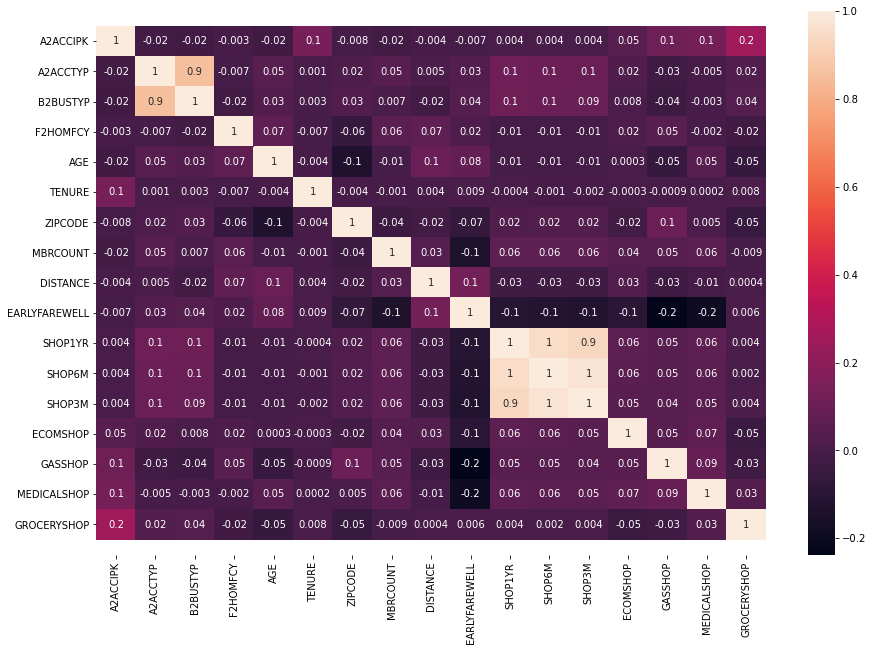

In [37]:
#correlation heatmap

#set the figure size
plt.figure(figsize=(15,10))

#making the correlation heatmap with annotations and setting the formatting of decimals to 1 significant digit
ax = sns.heatmap(df_member.corr(), annot = True, fmt='.1g')

#since bottom and top are getting cropped so lets extend the y limits 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### We can see from the correlation heatmap that 'SHOP1YR', 'SHOP6M' and 'SHOP3M' are highly correlated.

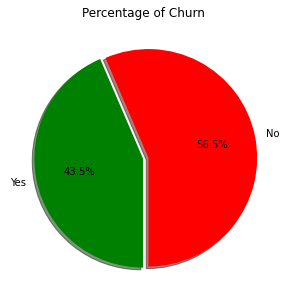

In [38]:
#Let us see what percentage of members have not renewed the membership by plotting a pie chart

%matplotlib inline
sizes = df_member['RENEW'].value_counts(sort = True)
colors = ["red","green"] 
rcParams['figure.figsize'] = 5,5
explode = (0.05,0)
labels = 'No', 'Yes'

# Plot
plt.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Churn')
plt.show()

#### We can see that 43.5% of the members have renewed their membership in the past and 56.5% have not renewed. This will help us in creating our training dataset which will help us in making good predictions.

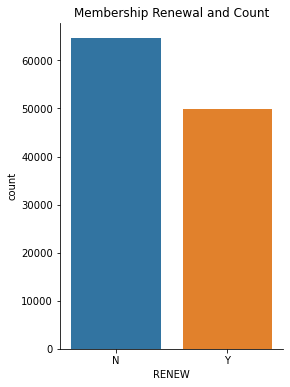

In [39]:
#bar plot for categorical variable 'RENEW'
plt.figure(figsize=(4,6))

sns.countplot(x="RENEW", data = df_member)
plt.title('Membership Renewal and Count')

ax1 = plt.axes()
ax1.spines['right'].set_visible(False)  # invisible right spine
ax1.spines['top'].set_visible(False)   # invisible top spine
plt.show()

#Y depicts membership renewal and N depicts membership non-renewal

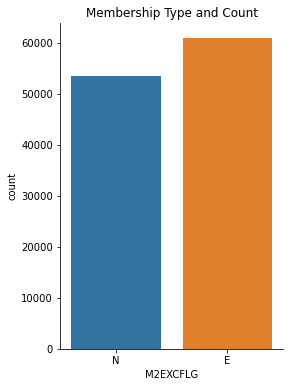

In [40]:
#bar plot for categorical variable 'M2EXCFLG' (Memebership type)
plt.figure(figsize=(4,6))

sns.countplot(x="M2EXCFLG", data = df_member)   
plt.title('Membership Type and Count')

ax1 = plt.axes()
ax1.spines['right'].set_visible(False)  # invisible right spine
ax1.spines['top'].set_visible(False)   # invisible top spine
plt.show()

#N denotes Non-Executive membership and E denotes Executive membership 

#### The above bar graph indicates the actual number of Executive and Non-Executive members in our dataset.

In [41]:
#Cross tabulation table for renewal status and type of membership
crosstab1 = pd.crosstab(df_member['M2EXCFLG'], df_member['RENEW'])
crosstab1

RENEW,N,Y
M2EXCFLG,,
E,28700,32227
N,35930,17613


<Figure size 720x432 with 0 Axes>

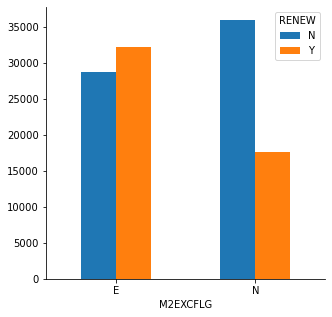

In [42]:
#double bar chart for crosstab1 (renewal status and type of membership)
plt.figure(figsize=(10,6))

crosstab1.plot(kind = "bar")

ax1 = plt.axes()
ax1.spines['right'].set_visible(False)  # invisible right spine
ax1.spines['top'].set_visible(False)   # invisible top spine
plt.xticks(rotation='horizontal')
plt.show()

#### From the double bar chart, we can interpret that people with executive membership renewed more than the people with non-executive membership.

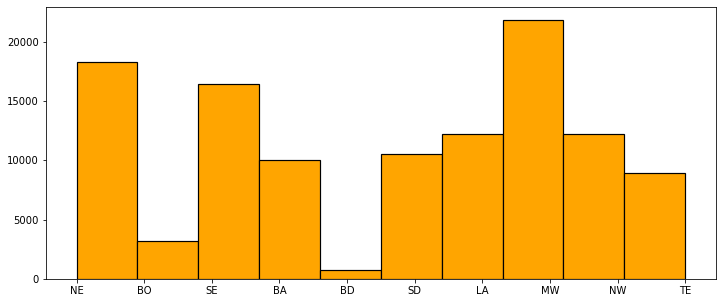

In [43]:
#setting the figure size
plt.figure(figsize=(12,5))

#plotting the histogram of Region
plt.hist(df_member['F2HOMRGN'], color='orange', edgecolor='black', linewidth=1.2)
plt.show()

### Distribution of all numeric predictors using histogram

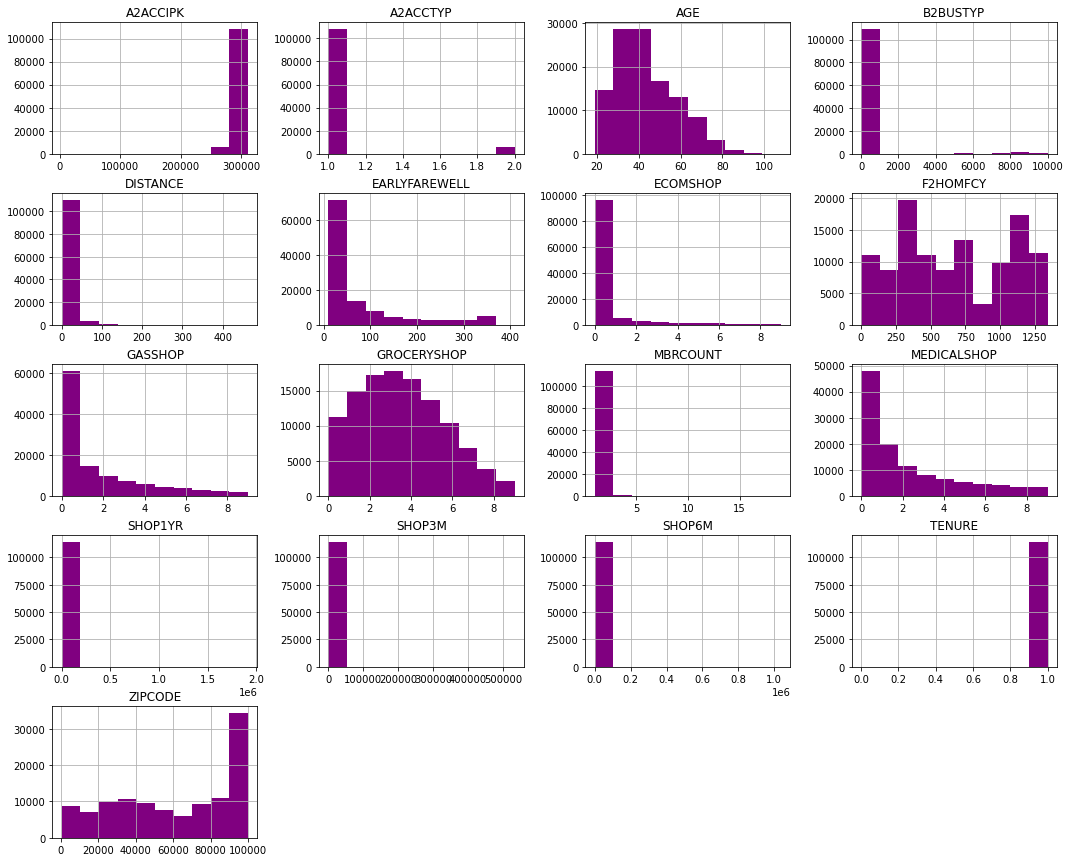

In [44]:
df_member.hist(figsize=(18,15), color='purple')
plt.show()

#### From the distribution, we can say that majority of our predictors are right skewed with a few left skewed. 

### Separating the list of categorical and numeric predictors

In [45]:
cat_cols=[]
num_cols=[]
for i in df_member.columns:
    if (df_member[i].dtype != "float64") and (df_member[i].dtype != 'int64'):
        cat_cols.append(i)
for i in df_member.columns:
    if (df_member[i].dtype == "float64") or (df_member[i].dtype == 'int64'):
        num_cols.append(i)

print(cat_cols)
print(num_cols)

['RENEW', 'M2EXCFLG', 'F2HOMRGN', 'HOMEFCTYCHANGE', 'RECENTMOVING']
['A2ACCIPK', 'A2ACCTYP', 'B2BUSTYP', 'F2HOMFCY', 'AGE', 'TENURE', 'ZIPCODE', 'MBRCOUNT', 'DISTANCE', 'EARLYFAREWELL', 'SHOP1YR', 'SHOP6M', 'SHOP3M', 'ECOMSHOP', 'GASSHOP', 'MEDICALSHOP', 'GROCERYSHOP']


### Distribution of categorical predictors with respect to 'RENEW'

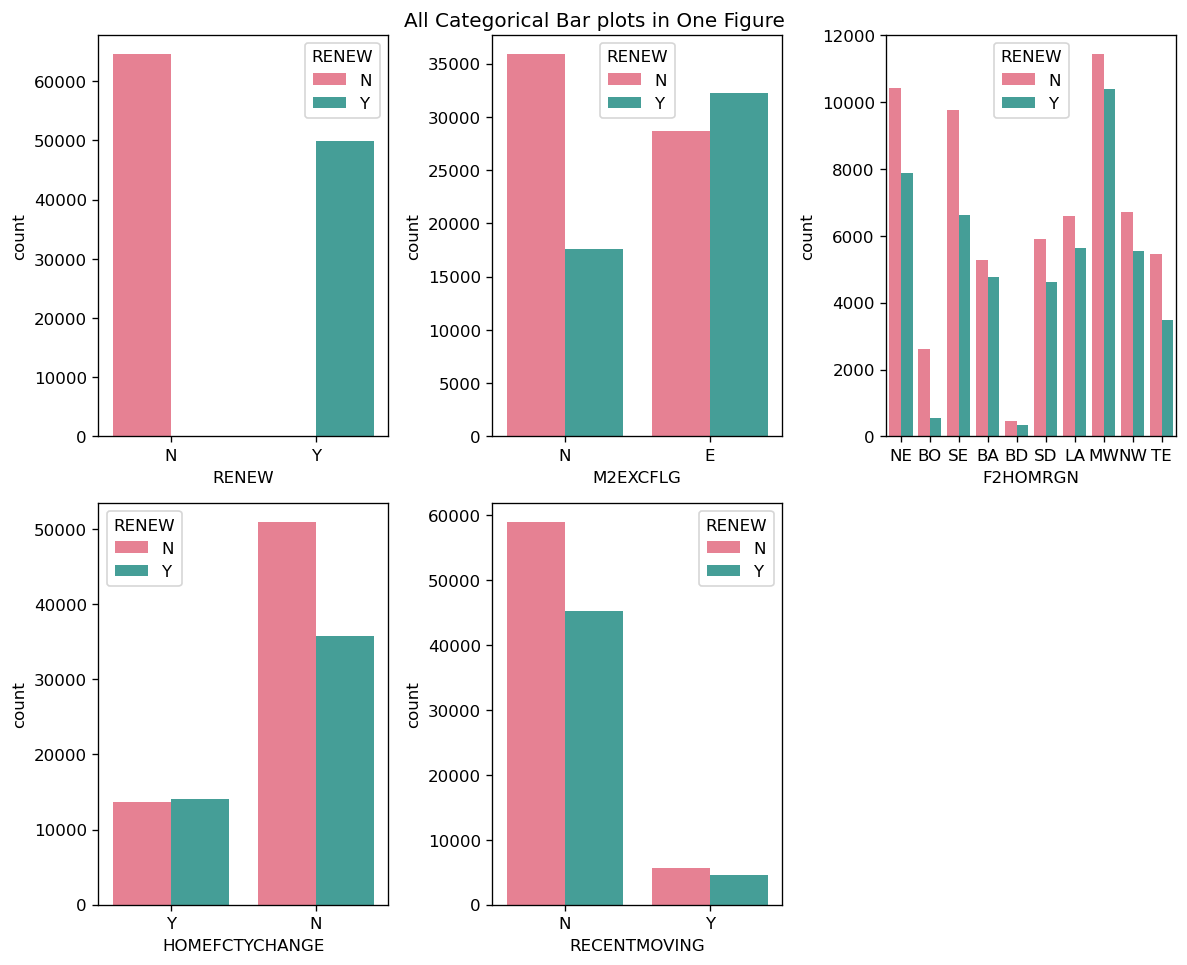

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(10, 8), dpi=120)
fig.delaxes(axes[1][2])

for ax,j in zip(axes.ravel(), cat_cols):
    sns.countplot(x=j, hue='RENEW', data=df_member, ax=ax, palette="husl")
    ax.tick_params(axis ='x')
    
plt.suptitle('All Categorical Bar plots in One Figure', verticalalignment='bottom', fontsize=12)    
plt.tight_layout()
plt.show()

#### We can observe that:
1. There are more members who do not renew than who renew.
2. For the non-executive category, the number of members who do not renew is almost double the number of members who renew.
3. For the executive category, the number of members who do not renew is almost the same as the number of members who renew.
4. In every region, the number of members who do not renew are more than the ones who renew. 

### Spread of numerical predictors with respect to 'RENEW'

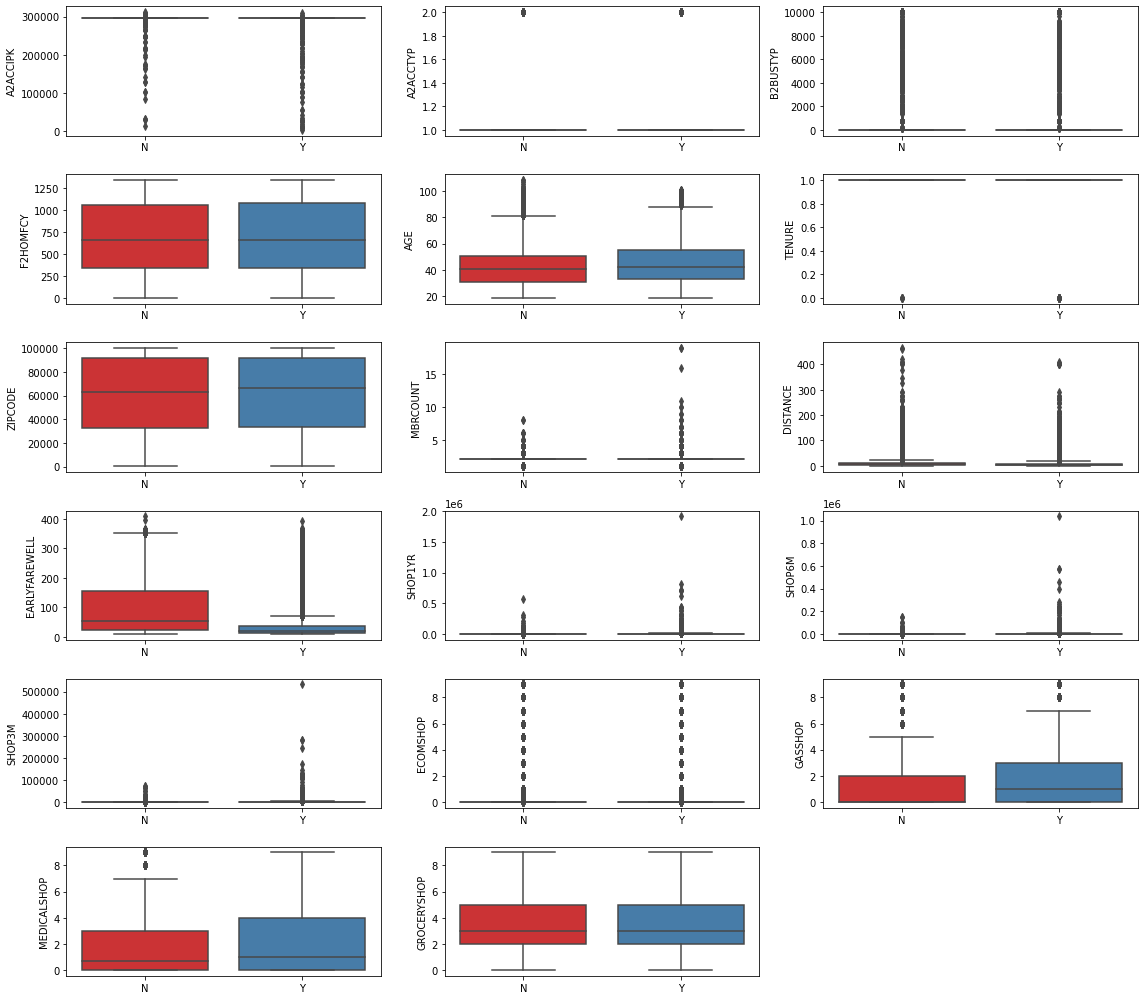

In [47]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(16, 14))
ax.flat[-1].set_visible(False)

for ax, fea in zip(ax.ravel(), num_cols):
    sns.boxplot(x='RENEW', y=fea, data=df_member, ax=ax, palette="Set1")
    ax.set_xlabel('')
    ax.set_ylabel(fea)
        
fig.tight_layout()

#### Our box plots indicate:
1. The spread of AGE for 'RENEW' Y and N is not much different from each other. However, we have a lot of outliers for both. We can trying binning the AGE to form groups and see how it will impact our model predictions.
2. The 'EARLYFAREWELL' for the both 'RENEW' Y and N is not symmetrical. The data looks right skewed.
3. The spread for warehouse number 'F2HOMFCY' is almost symmetrical for both 'RENEW' Y and N.
4. The 'GASSHOP' for the both 'RENEW' Y and N is not symmetrical. The data looks right skewed.
5. The spread for 'GROCERYSHOP' is almost symmetrical for both 'RENEW' Y and N.
6. The spread for 'MEDICALSHOP' is not symmetrical. The data looks right skewed.

### Kernel Density Plot for EARLYFAREWELL

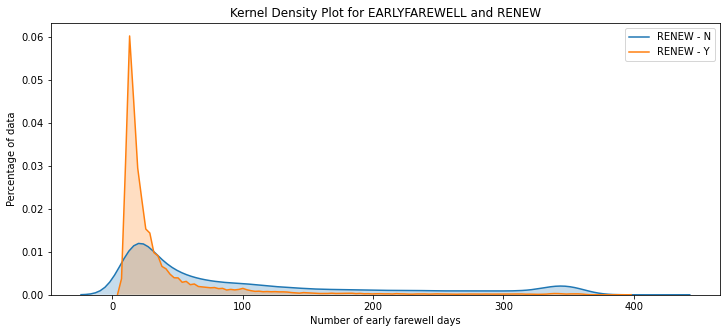

In [48]:
plt.figure(figsize=(12,5))
a = sns.kdeplot(df_member.loc[df_member.RENEW=='N', 'EARLYFAREWELL'], shade=True, label='RENEW - N');
sns.kdeplot(df_member.loc[df_member.RENEW=='Y', 'EARLYFAREWELL'], shade=True, ax=a, label='RENEW - Y');
plt.xlabel('Number of early farewell days')
plt.ylabel('Percentage of data')
plt.title('Kernel Density Plot for EARLYFAREWELL and RENEW')
plt.show()

#### From the kernel density plot, we can say that members who generally RENEW visit the store often, which is quite an obvious observation too. 

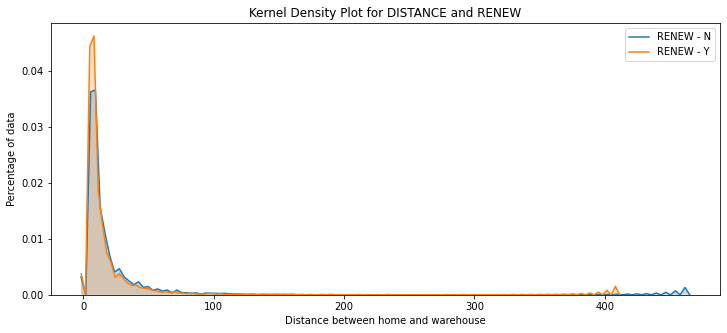

In [49]:
plt.figure(figsize=(12,5))
a = sns.kdeplot(df_member.loc[df_member.RENEW=='N', 'DISTANCE'], shade=True, label='RENEW - N');
sns.kdeplot(df_member.loc[df_member.RENEW=='Y', 'DISTANCE'], shade=True, ax=a, label='RENEW - Y');
plt.xlabel('Distance between home and warehouse')
plt.ylabel('Percentage of data')
plt.title('Kernel Density Plot for DISTANCE and RENEW')
plt.show()

#### We can observe from this kernel density plot that most of the people live in close proximity to the store and there is no obvious relation between distance and members who renew and who do not. 

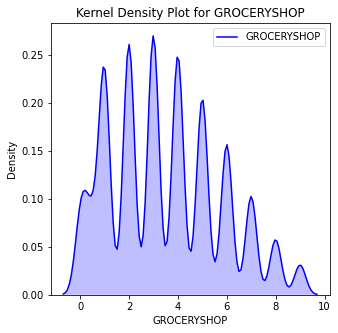

In [50]:
sns.kdeplot(df_member.GROCERYSHOP, color='b', shade=True)
plt.xlabel('GROCERYSHOP')
plt.ylabel('Density')
plt.title('Kernel Density Plot for GROCERYSHOP')
plt.show()

#### The kernel density plot produces smooth curve estimating the probability density function of a continuous variable with peaks of the density plot displaying where values are concenterated over the interval. Here, the continuous variable is GROCERYSHOP and the continuous smooth curve depicts the probability density function of that variable. We can see that the plot depicts a comb distribution with alternate high and low peaks. This could have occured due to rounding off or some mistake.

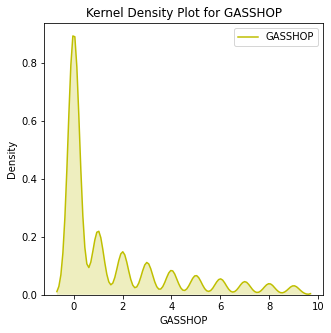

In [51]:
sns.kdeplot(df_member.GASSHOP, color='y', shade=True)
plt.xlabel('GASSHOP')
plt.ylabel('Density')
plt.title('Kernel Density Plot for GASSHOP')
plt.show()

#### Here, the continuous variable is GASSHOP and the continuous smooth curve depicts the probability density function of that variable. We can see that the plot depicts a comb distribution with alternate high and low peaks. This could have occured due to rounding off or some mistake. However, it is clear from the graph that the density is more near the 1 indicating that more members actually shop less for GAS at the store. 

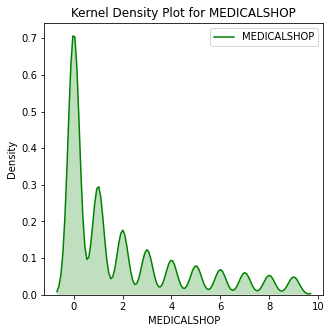

In [52]:
sns.kdeplot(df_member.MEDICALSHOP, color='g', shade=True)
plt.xlabel('MEDICALSHOP')
plt.ylabel('Density')
plt.title('Kernel Density Plot for MEDICALSHOP')
plt.show()

#### Here, the continuous variable is MEDICAL and the continuous smooth curve depicts the probability density function of that variable. We can see that the plot depicts a comb distribution with alternate high and low peaks. This could have occured due to rounding off or some mistake. However, it is clear from the graph that the density is more near the 1 indicating that more members actually shop less for the MEDICAL stuffs at the store. 

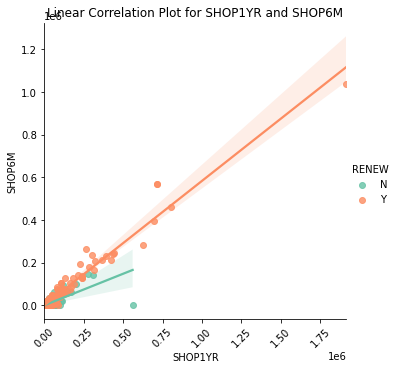

In [53]:
sns.lmplot('SHOP1YR', 'SHOP6M', data=df_member, hue='RENEW', fit_reg=True, palette="Set2")
plt.xticks(rotation=45)
plt.title('Linear Correlation Plot for SHOP1YR and SHOP6M')
plt.show()

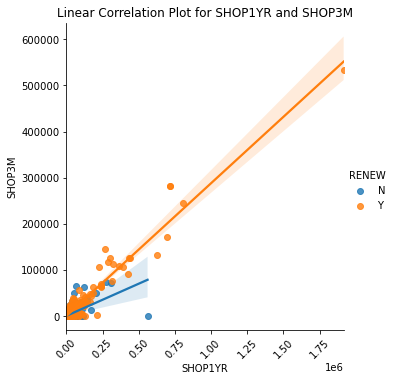

In [54]:
sns.lmplot('SHOP1YR', 'SHOP3M', data=df_member, hue='RENEW', fit_reg=True)
plt.xticks(rotation=45)
plt.title('Linear Correlation Plot for SHOP1YR and SHOP3M')
plt.show()

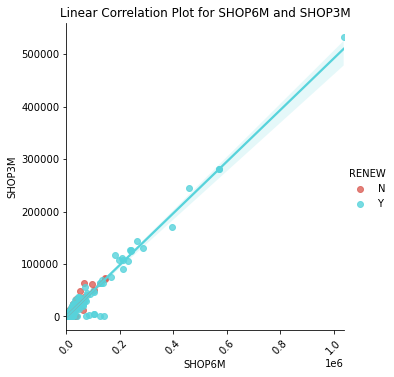

In [55]:
sns.lmplot('SHOP6M', 'SHOP3M', data=df_member, hue='RENEW', fit_reg=True, palette="hls")
plt.xticks(rotation=45)
plt.title('Linear Correlation Plot for SHOP6M and SHOP3M')
plt.show()

#### The data for SHOP1YR, SHOP6M and SHOP3M seems to be highly linearly correlated from these graphs too.

## Data Pre-processing continued

### Converting our response variable to binary numeric variable

In [56]:
#Converting the response variable in a binary numeric variable
df_member['RENEW'].replace(to_replace='Y', value=1, inplace=True)
df_member['RENEW'].replace(to_replace='N',  value=0, inplace=True)

df_member.head()

,RENEW,A2ACCIPK,A2ACCTYP,M2EXCFLG,B2BUSTYP,F2HOMRGN,F2HOMFCY,AGE,TENURE,ZIPCODE,...,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,0,280928,1,N,0,NE,1078,42,1,20715,...,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,0,280100,1,N,0,BO,847,61,1,77346,...,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,0,279886,1,N,0,BO,847,52,1,91024,...,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,0,279912,1,N,0,SE,185,32,1,32789,...,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,0,279896,1,E,0,BA,472,46,1,93960,...,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


### Correlation between 'RENEW' and predictors

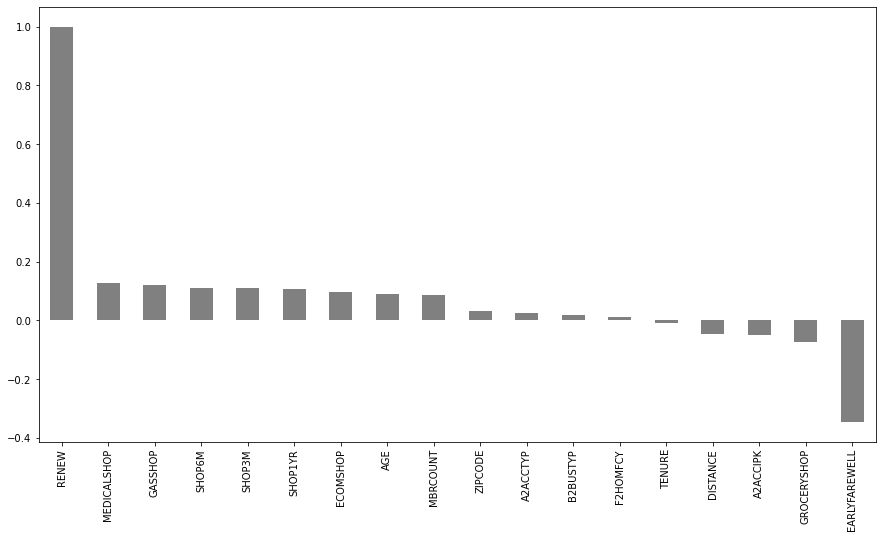

In [57]:
#Finding the Correlation of 'RENEW' with other variables
plt.figure(figsize=(15,8))

df_member.corr()['RENEW'].sort_values(ascending = False).plot(kind='bar', color='grey')
plt.show()

#### We can see that 'M2EXCFLG_E', 'MEDICALSHOP', 'GASSHOP', 'SHOP6M', 'SHOP3M', 'SHOP1YR', 'ECOMSHOP', 'MBRCOUNT', 'HOMECITYCHANGE_Y', 'AGE GROUP_Senior' are positively correlated with 'RENEW'. 

#### On the other hand, 'M2EXCFLG_N', 'HOMECITYCHANGE_N', 'AGE GROUP_Adult', 'GASSHOP' are negatively correlated with 'RENEW'.

### Dropping irrelevant columns

#### Dropping Column 'A2ACCIPK' from our dataset as it contains multiple Member IDs and it will not help us in making predictions.

In [58]:
#dropping Column 'A2ACCIPK' (Member ID)
df_member.drop(['A2ACCIPK'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,B2BUSTYP,F2HOMRGN,F2HOMFCY,AGE,TENURE,ZIPCODE,MBRCOUNT,...,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,0,1,N,0,NE,1078,42,1,20715,2,...,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,0,1,N,0,BO,847,61,1,77346,2,...,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,0,1,N,0,BO,847,52,1,91024,2,...,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,0,1,N,0,SE,185,32,1,32789,2,...,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,0,1,E,0,BA,472,46,1,93960,2,...,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


#### Dropping Column 'B2BUSTYP' from our dataset as it does not seem to help us in making predictions. Also, the correlation between 'B2BUSTYP' and 'RENEW' is very low.

In [59]:
#dropping the Column 'B2BUSTYP' 
df_member.drop(['B2BUSTYP'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,F2HOMRGN,F2HOMFCY,AGE,TENURE,ZIPCODE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,0,1,N,NE,1078,42,1,20715,2,7.533935,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,0,1,N,BO,847,61,1,77346,2,6.048289,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,0,1,N,BO,847,52,1,91024,2,7.887369,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,0,1,N,SE,185,32,1,32789,2,3.434547,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,0,1,E,BA,472,46,1,93960,2,26.287360,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


#### Dropping Column F2HOMRGN from our dataset as it is a categorical variable and a lot of dummies will get created for it.

In [60]:
#dropping Column 'F2HOMRGN'
df_member.drop(['F2HOMRGN'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,F2HOMFCY,AGE,TENURE,ZIPCODE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,0,1,N,1078,42,1,20715,2,7.533935,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,0,1,N,847,61,1,77346,2,6.048289,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,0,1,N,847,52,1,91024,2,7.887369,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,0,1,N,185,32,1,32789,2,3.434547,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,0,1,E,472,46,1,93960,2,26.287360,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


#### Dropping Column 'F2HOMFCY' from our dataset as the correlation between 'F2HOMFCY' and 'RENEW' is very low.

In [61]:
#dropping Column 'F2HOMFCY'
df_member.drop(['F2HOMFCY'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,AGE,TENURE,ZIPCODE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,0,1,N,42,1,20715,2,7.533935,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,0,1,N,61,1,77346,2,6.048289,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,0,1,N,52,1,91024,2,7.887369,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,0,1,N,32,1,32789,2,3.434547,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,0,1,E,46,1,93960,2,26.287360,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


#### Dropping Column 'ZIPCODE' from our dataset as the correlation between 'ZIPCODE' and 'RENEW' is very low.

In [62]:
#dropping Column 'ZIPCODE'
df_member.drop(['ZIPCODE'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,AGE,TENURE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP
0,0,1,N,42,1,2,7.533935,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668
1,0,1,N,61,1,2,6.048289,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000
2,0,1,N,52,1,2,7.887369,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103
3,0,1,N,32,1,2,3.434547,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492
4,0,1,E,46,1,2,26.287360,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876


#### Add a new column 'AGE GROUP'

In [63]:
#Adding a new column 'AGE GROUP'
df_member.loc[df_member['AGE'] >= 55, 'AGE GROUP'] = 'Senior'
df_member.loc[df_member['AGE'] < 55, 'AGE GROUP'] = 'Adult'

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,AGE,TENURE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,AGE GROUP
0,0,1,N,42,1,2,7.533935,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668,Adult
1,0,1,N,61,1,2,6.048289,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000,Senior
2,0,1,N,52,1,2,7.887369,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103,Adult
3,0,1,N,32,1,2,3.434547,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492,Adult
4,0,1,E,46,1,2,26.287360,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876,Adult


#### Here, we have created a new column AGE GROUP based on age value. 

#### Dropping column AGE as well, as we have already created AGE GROUPS from that.

In [64]:
#Dropping Column 'AGE'
df_member.drop(['AGE'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,TENURE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP1YR,SHOP6M,SHOP3M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,AGE GROUP
0,0,1,N,1,2,7.533935,75,Y,N,1385.430054,827.710022,253.279999,0.0,0.0293,0.01730,0.522668,Adult
1,0,1,N,1,2,6.048289,320,N,N,3499.889893,0.000000,0.000000,1.0,0.0000,0.00000,0.000000,Senior
2,0,1,N,1,2,7.887369,350,N,N,113.540001,0.000000,0.000000,0.0,0.0000,0.30377,0.234103,Adult
3,0,1,N,1,2,3.434547,137,N,N,997.109985,23.230000,0.000000,0.0,0.0251,0.00000,0.405492,Adult
4,0,1,E,1,2,26.287360,41,N,N,12579.160160,72.959999,72.959999,0.0,0.0000,0.00818,0.935876,Adult


#### From the correlation map, we can see that SHOP1YR, SHOP6M and SHOP3M are highly correlated. Also, all three have the same correlation with RENEW, so we can remove two columns from these. Let us remove SHOP3M as this indicates that the person has just taken the membership. Let us keep SHOP6M to make our predictions.

In [65]:
#Dropping Column 'SHOP3M'
df_member.drop(['SHOP3M'], axis=1, inplace=True)

#Dropping Column 'SHOP1Y'
df_member.drop(['SHOP1YR'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,TENURE,MBRCOUNT,DISTANCE,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP6M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,AGE GROUP
0,0,1,N,1,2,7.533935,75,Y,N,827.710022,0.0,0.0293,0.01730,0.522668,Adult
1,0,1,N,1,2,6.048289,320,N,N,0.000000,1.0,0.0000,0.00000,0.000000,Senior
2,0,1,N,1,2,7.887369,350,N,N,0.000000,0.0,0.0000,0.30377,0.234103,Adult
3,0,1,N,1,2,3.434547,137,N,N,23.230000,0.0,0.0251,0.00000,0.405492,Adult
4,0,1,E,1,2,26.287360,41,N,N,72.959999,0.0,0.0000,0.00818,0.935876,Adult


#### Removing column DISTANCE from our dataset as its correlation with RENEW is very low. Also, it can change when a member changes his address or chances are that a member may be get this updated even after changing the home.

In [66]:
#Dropping Column 'DISTANCE'
df_member.drop(['DISTANCE'], axis=1, inplace=True)

#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,M2EXCFLG,TENURE,MBRCOUNT,EARLYFAREWELL,HOMEFCTYCHANGE,RECENTMOVING,SHOP6M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,AGE GROUP
0,0,1,N,1,2,75,Y,N,827.710022,0.0,0.0293,0.01730,0.522668,Adult
1,0,1,N,1,2,320,N,N,0.000000,1.0,0.0000,0.00000,0.000000,Senior
2,0,1,N,1,2,350,N,N,0.000000,0.0,0.0000,0.30377,0.234103,Adult
3,0,1,N,1,2,137,N,N,23.230000,0.0,0.0251,0.00000,0.405492,Adult
4,0,1,E,1,2,41,N,N,72.959999,0.0,0.0000,0.00818,0.935876,Adult


#### To make our predictions, we need categorical data into numerical form. So, let us create dummies for all the categorical variables.

In [67]:
#creating dummy variables
df_member = pd.get_dummies(df_member)
df_member.head()

,RENEW,A2ACCTYP,TENURE,MBRCOUNT,EARLYFAREWELL,SHOP6M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,M2EXCFLG_E,M2EXCFLG_N,HOMEFCTYCHANGE_N,HOMEFCTYCHANGE_Y,RECENTMOVING_N,RECENTMOVING_Y,AGE GROUP_Adult,AGE GROUP_Senior
0,0,1,1,2,75,827.710022,0.0,0.0293,0.01730,0.522668,0,1,0,1,1,0,1,0
1,0,1,1,2,320,0.000000,1.0,0.0000,0.00000,0.000000,0,1,1,0,1,0,0,1
2,0,1,1,2,350,0.000000,0.0,0.0000,0.30377,0.234103,0,1,1,0,1,0,1,0
3,0,1,1,2,137,23.230000,0.0,0.0251,0.00000,0.405492,0,1,1,0,1,0,1,0
4,0,1,1,2,41,72.959999,0.0,0.0000,0.00818,0.935876,1,0,1,0,1,0,1,0


#### In order to apply machine learning algorithm, we keep n-1 dummies if we have n values in a column. So, let us remove 1 dummy for each categroical column.

In [68]:
df_member.drop(labels = ['M2EXCFLG_N','HOMEFCTYCHANGE_N','RECENTMOVING_N','AGE GROUP_Adult'], axis = 1, inplace=True)

In [69]:
#looking at the dataset again
df_member.head()

,RENEW,A2ACCTYP,TENURE,MBRCOUNT,EARLYFAREWELL,SHOP6M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,M2EXCFLG_E,HOMEFCTYCHANGE_Y,RECENTMOVING_Y,AGE GROUP_Senior
0,0,1,1,2,75,827.710022,0.0,0.0293,0.01730,0.522668,0,1,0,0
1,0,1,1,2,320,0.000000,1.0,0.0000,0.00000,0.000000,0,0,0,1
2,0,1,1,2,350,0.000000,0.0,0.0000,0.30377,0.234103,0,0,0,0
3,0,1,1,2,137,23.230000,0.0,0.0251,0.00000,0.405492,0,0,0,0
4,0,1,1,2,41,72.959999,0.0,0.0000,0.00818,0.935876,1,0,0,0


#### Also, let us look at the new shape of our dataset.

In [70]:
#shape
df_member.shape

(114470, 14)

#### So, we now have 15 columns and 114470 rows.

### Model Preparation

#### Splitting ratio: 70-30

In [71]:
df_member['RENEW'] = df_member['RENEW'].astype(int)
X = df_member.drop(labels = ['RENEW'], axis = 1)
y = df_member['RENEW'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

### Logistic Regression 

#### Performing feature scaling to standardize our variables in order to make predictions using Logistic Regression.

In [72]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [75]:
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15111,  4278],
       [ 5798,  9154]], dtype=int64)

In [76]:
#looking at the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.706589790629277


In [77]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     19389
           1       0.68      0.61      0.65     14952

    accuracy                           0.71     34341
   macro avg       0.70      0.70      0.70     34341
weighted avg       0.70      0.71      0.70     34341



###### The accuracy score is 70.66%, which is not bad. But, let us see if we can improve this score.

AxesSubplot(0.125,0.125;0.775x0.755)


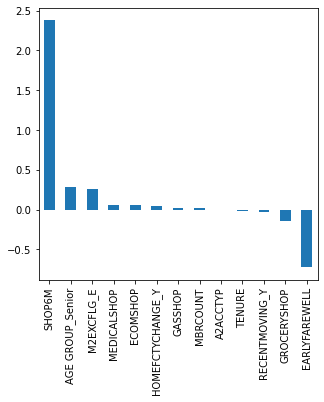

In [78]:
#Getting the weights of all the variables
weights = pd.Series(classifier.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:].plot(kind='bar'))

#### Looks like MBRCOUNT and A2ACCTYP has no impact on our model. So, let us remove these columns and see our accuracy score.

In [79]:
#Removing the predictors with no correlation with RENEW
df_member_logReg1 = df_member.drop(['A2ACCTYP','MBRCOUNT'], axis=1)
df_member_logReg1.head()

,RENEW,TENURE,EARLYFAREWELL,SHOP6M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,M2EXCFLG_E,HOMEFCTYCHANGE_Y,RECENTMOVING_Y,AGE GROUP_Senior
0,0,1,75,827.710022,0.0,0.0293,0.01730,0.522668,0,1,0,0
1,0,1,320,0.000000,1.0,0.0000,0.00000,0.000000,0,0,0,1
2,0,1,350,0.000000,0.0,0.0000,0.30377,0.234103,0,0,0,0
3,0,1,137,23.230000,0.0,0.0251,0.00000,0.405492,0,0,0,0
4,0,1,41,72.959999,0.0,0.0000,0.00818,0.935876,1,0,0,0


In [80]:
df_member_logReg1['RENEW'] = df_member_logReg1['RENEW'].astype(int)
X = df_member_logReg1.drop(labels = ['RENEW'], axis = 1)
y = df_member_logReg1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [81]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
#Fitting Logistic Regression to the Training set
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
#Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [84]:
#Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[15093,  4296],
       [ 5786,  9166]], dtype=int64)

In [85]:
#Printing the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7064150723624821


In [86]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     19389
           1       0.68      0.61      0.65     14952

    accuracy                           0.71     34341
   macro avg       0.70      0.70      0.70     34341
weighted avg       0.70      0.71      0.70     34341



#### We get an accuracy score of 70.64% which is a slightly lower than earlier accuracy of 70.66%. Let us tune our model more to see if we get any better result.

In [87]:
#Removing a few more variables from our dataframe and make predictions
df_member_logReg2 = df_member.drop(['A2ACCTYP','MBRCOUNT','TENURE','GASSHOP'], axis=1)
df_member_logReg2.head()

,RENEW,EARLYFAREWELL,SHOP6M,ECOMSHOP,MEDICALSHOP,GROCERYSHOP,M2EXCFLG_E,HOMEFCTYCHANGE_Y,RECENTMOVING_Y,AGE GROUP_Senior
0,0,75,827.710022,0.0,0.01730,0.522668,0,1,0,0
1,0,320,0.000000,1.0,0.00000,0.000000,0,0,0,1
2,0,350,0.000000,0.0,0.30377,0.234103,0,0,0,0
3,0,137,23.230000,0.0,0.00000,0.405492,0,0,0,0
4,0,41,72.959999,0.0,0.00818,0.935876,1,0,0,0


In [88]:
df_member_logReg2['RENEW'] = df_member_logReg2['RENEW'].astype(int)
X = df_member_logReg2.drop(labels = ['RENEW'], axis = 1)
y = df_member_logReg2['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [89]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
#Fitting Logistic Regression to the Training set
classifier2 = LogisticRegression()
classifier2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#Predicting the Test set results
y_pred = classifier2.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [92]:
#Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[15080,  4309],
       [ 5791,  9161]], dtype=int64)

In [93]:
#Printing the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7058909175620978


In [94]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     19389
           1       0.68      0.61      0.64     14952

    accuracy                           0.71     34341
   macro avg       0.70      0.70      0.70     34341
weighted avg       0.70      0.71      0.70     34341



#### The accuracy reduced to 70.586%. Let us do fine tuning one more time.

In [95]:
#Removing a few more variables from our dataframe and make predictions
df_member_logReg3 = df_member.drop(['A2ACCTYP','MBRCOUNT','TENURE','GASSHOP','MEDICALSHOP','ECOMSHOP','HOMEFCTYCHANGE_Y','RECENTMOVING_Y'], axis=1)
df_member_logReg3.head()

,RENEW,EARLYFAREWELL,SHOP6M,GROCERYSHOP,M2EXCFLG_E,AGE GROUP_Senior
0,0,75,827.710022,0.522668,0,0
1,0,320,0.000000,0.000000,0,1
2,0,350,0.000000,0.234103,0,0
3,0,137,23.230000,0.405492,0,0
4,0,41,72.959999,0.935876,1,0


In [96]:
df_member_logReg3['RENEW'] = df_member_logReg3['RENEW'].astype(int)
X = df_member_logReg3.drop(labels = ['RENEW'], axis = 1)
y = df_member_logReg3['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [97]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
#Fitting Logistic Regression to the Training set
classifier3 = LogisticRegression()
classifier3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
#Predicting the Test set results
y_pred = classifier3.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [100]:
#Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[15077,  4312],
       [ 5799,  9153]], dtype=int64)

In [101]:
#Printing the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7055706007396406


In [102]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     19389
           1       0.68      0.61      0.64     14952

    accuracy                           0.71     34341
   macro avg       0.70      0.69      0.70     34341
weighted avg       0.70      0.71      0.70     34341



#### We got an accuracy score of 70.554%. 

#### We have seen from our logistic regression models that the fine tuning of predictors is not making much impact on the accuracy score. Infact, the last logistic model predicted quite well with a very few predictors.

In [103]:
df_member_logReg3.columns.values

array(['RENEW', 'EARLYFAREWELL', 'SHOP6M', 'GROCERYSHOP', 'M2EXCFLG_E',
       'AGE GROUP_Senior'], dtype=object)

#### So, we can say that we got the best accuracy score of 70.554% with following predictors:
#####  'EARLYFAREWELL', 'SHOP6M', 'GROCERYSHOP', 'M2EXCFLG_E', 'AGE GROUP_Senior'

#### Let us look at the weight chart and write the interpretation for this model.

AxesSubplot(0.125,0.125;0.775x0.755)


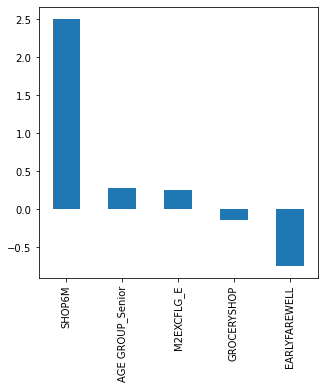

In [104]:
#Getting the weights of all the variables
weights = pd.Series(classifier3.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending = False)[:].plot(kind='bar'))

#### We can see from the weights that 'SHOP6M', 'AGE GROUP_Senior', 'M2EXCFLG_E' positively impacts our model whereas 'GROCERYSHOP' and 'EARLYFAREWELL' negatively impacts our model. 

In [105]:
accuracies = cross_val_score(classifier3, X_train, y_train, cv=10)
print("Accuracy: %.2f%%" % (accuracies.mean()*100.0))

Accuracy: 70.70%


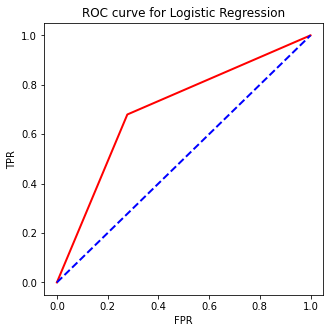

In [106]:
##Computing false and true positive rates
fpr, tpr, _ = roc_curve(classifier3.predict(X_test), y_test, drop_intermediate=False)

plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')
plt.show()

#### AUC is a plot between False Positive Rate and True Positive Rate. It uses multiple confusion matrices with different thresholds to find the true positives, true negatives, false positives and false negatives and plot the same as a curve which is the red one in our case. This red curve is an ROC curve which summarises all the confusion matrices that each threshold produced. Any point which exists on the blue dotted line represents that the True Positive Rate = True Negative Rate, which means the proportion of correctly classified members who RENEW is same as the proportion of incorrectly classified members who do not RENEW.

In [107]:
roc_auc_score(classifier3.predict(X_test), y_test)

0.7009896233071669

#### ROC curve makes it easy to understand the best threshold for making a decision whereas AUC helps in deciding which classification method is better. The ROC AUC score is 0.7 in this case, which is a fairly good score.

#### We will try to make a single curve for our some of the best models and see which one is the best.

## k-Nearest Neighbors

#### Since K-NN works with distance, we need to use the scaled data in our make predictions using K-Nearest Neighbors. 

In [108]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
knn = KNeighborsClassifier(metric='minkowski', p=2)
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
#Predicting the Test set results
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [111]:
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14162,  5227],
       [ 5682,  9270]], dtype=int64)

In [112]:
#Printing the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.6823330712559331


#### We get an accuracy score of 68.2% for k = 5. Let us find out the best value of k by calculating the accuracy score and error for various values of k.

In [113]:
#Choosing the value of k from 1 to 100 and storing it in an array
neighbors = np.arange(1,101)

#creating empty arrays equal to the length of neighbors to store the accuracy score
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    
    #Fit the model 
    knn.fit(X_train, y_train) 
    
    #Predicting the Test set results
    #y_pred = knn.predict(X_test)

    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(X_train, y_train) 
    
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    #printing the index and the train and test accuracy at that index
    #print(i, train_accuracy[i])
    #print(i, test_accuracy[i])

#printing the train and test accuracy
print(train_accuracy)
print(test_accuracy)

[0.98591022 0.82873866 0.82296048 0.78252568 0.78161465 0.76364362
 0.76250796 0.75347253 0.7522495  0.74694555 0.74700795 0.74278975
 0.74288959 0.73927043 0.73885859 0.73652485 0.73676197 0.73505223
 0.73493991 0.73299305 0.73326761 0.7323441  0.73223178 0.73148298
 0.7315329  0.72978572 0.72971084 0.72921165 0.72823822 0.72778894
 0.72692783 0.72650351 0.725892   0.72609168 0.72574224 0.72565488
 0.7259544  0.72548016 0.7253304  0.7253304  0.72503089 0.72484369
 0.72460657 0.72385778 0.72377042 0.72307155 0.72367058 0.72314643
 0.72322131 0.72318387 0.72349586 0.72355826 0.7236581  0.72368306
 0.72343346 0.72308403 0.72327123 0.72260979 0.72233523 0.72224788
 0.72184852 0.7219234  0.72153652 0.72226036 0.72197332 0.72133684
 0.72171124 0.72071285 0.72134932 0.72086261 0.72101237 0.72035093
 0.72040085 0.72001398 0.72020118 0.72001398 0.7201263  0.71997654
 0.7195647  0.71940246 0.71929014 0.71885335 0.71910295 0.71850391
 0.71881591 0.71841655 0.71849143 0.71844151 0.71849143 0.7186

In [114]:
#printing the maximum test accuracy
print(max(test_accuracy))

#finding the index where we get the maximum accuracy
index = [i for i, x in enumerate(test_accuracy) if x == max(test_accuracy)]
print(index)

0.71453947176844
[66]


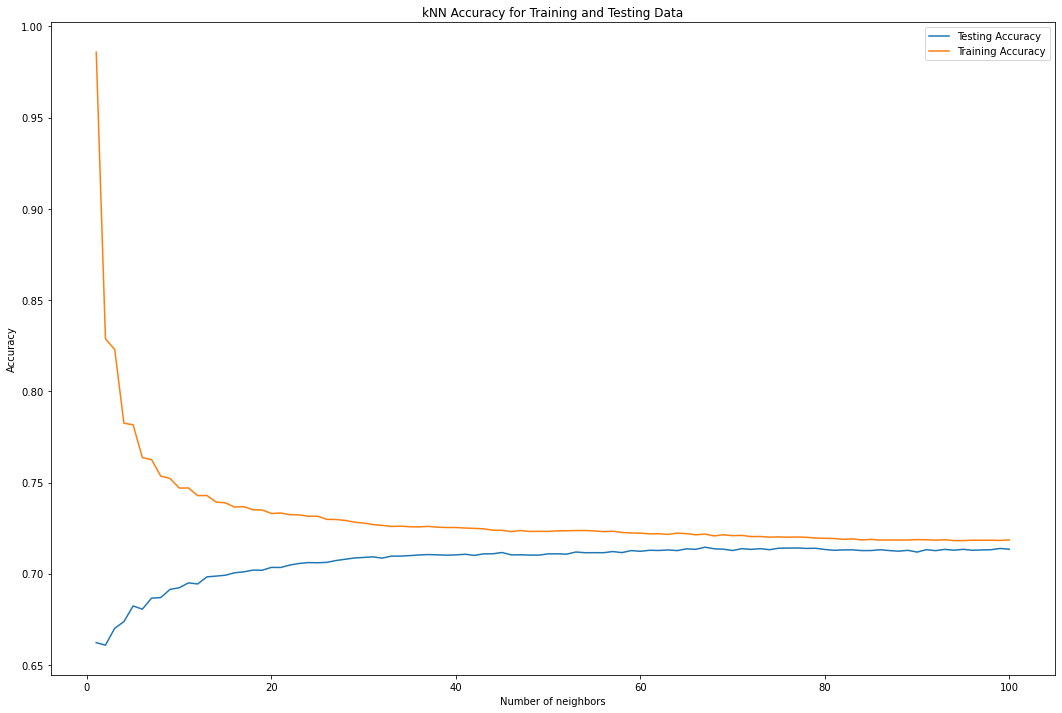

In [115]:
#Generate plot to visualize the testing and training score
plt.figure(figsize=(18,12))
plt.title('kNN Accuracy for Training and Testing Data')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### We can see that we get the maximum accuracy for k = 66. Let us find out the value of k for which the error is mimimun.

In [116]:
#plotting error graph to get the best value of k
error = []

#calculating error for k ranging between 1 and 100
for i in range(1,101):
    
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    e = np.mean(pred_i != y_test)
    
    #print(i, e)
    
    error.append(e)

#printing the error
print(error)

[0.33778864913660056, 0.33915727555982644, 0.32992632713083486, 0.3262572435281442, 0.3176669287440669, 0.31944323112314726, 0.3133863312075944, 0.3130660143851373, 0.3085815788707376, 0.30770798753676365, 0.3050289741125768, 0.3056113683352261, 0.3017384467546082, 0.3013016510876212, 0.3008357357095018, 0.29949622899740835, 0.298972074197024, 0.2980111237296526, 0.29809848286305, 0.29652601846189686, 0.29658425788416176, 0.2952447511720684, 0.2943711598380944, 0.29390524445997496, 0.29399260359337237, 0.2937887656154451, 0.2927695757258088, 0.2920707026586296, 0.29137182959145047, 0.2910806324801258, 0.2907603156576687, 0.29145918872484783, 0.29035263970181413, 0.29035263970181413, 0.2900614425904895, 0.2897120060568999, 0.28950816807897267, 0.289653766634635, 0.28982848490142976, 0.28968288634576744, 0.28933344981217785, 0.2899449637459596, 0.2891296118342506, 0.28907137241198566, 0.2883724993448065, 0.28968288634576744, 0.28962464692350254, 0.2897993651902973, 0.2897993651902973, 0.

In [117]:
#printing the minimum value of error
print(min(error))

#finding the index where we get the minimum error
index = [i for i, x in enumerate(error) if x == min(error)]
print(index)

0.28546052823155993
[66]


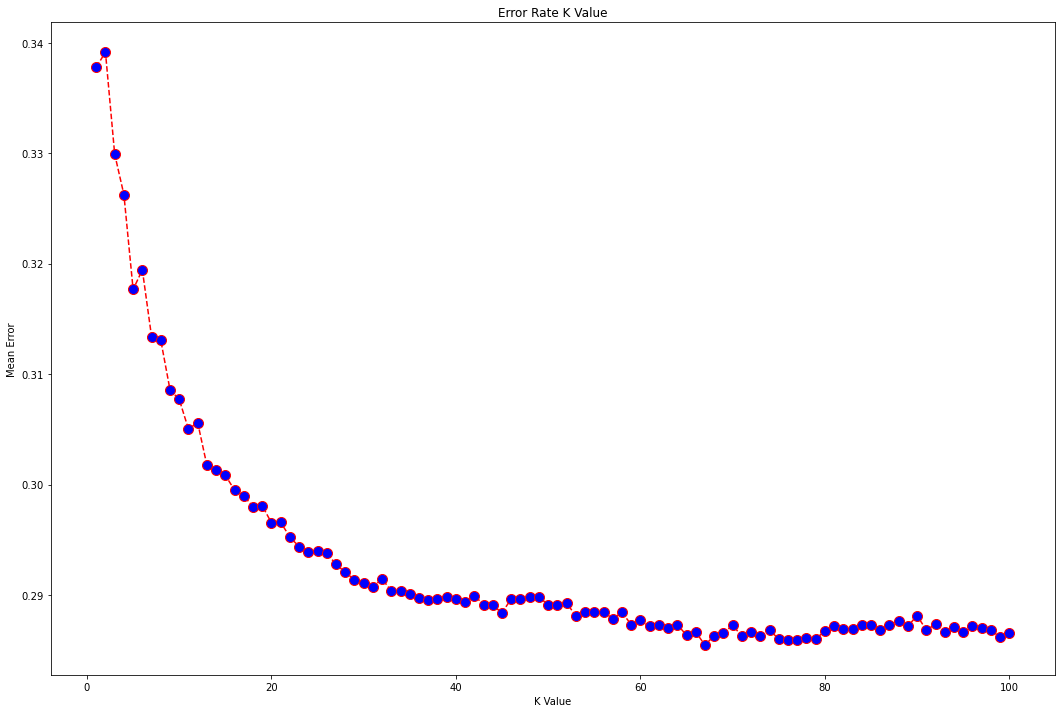

In [118]:
plt.figure(figsize=(18,12))
plt.plot(range(1,101), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

#### We can see that we get the minimum error for k = 66. 

#### We know that we generally avoid even value for k to avoid any tie between classes so let us take an odd value for k which has similar accuracy and error as k = 66.

In [119]:
knn_error = sorted(error)
print(knn_error)

[0.28546052823155993, 0.28589732389854694, 0.28595556332081185, 0.2860138027430768, 0.28604292245420926, 0.28613028158760667, 0.2861594012987391, 0.286275880143269, 0.286275880143269, 0.2863341195655339, 0.28636323927666635, 0.2865670772545936, 0.2865670772545936, 0.2866253166768586, 0.28665443638799104, 0.28665443638799104, 0.28665443638799104, 0.28671267581025595, 0.2868291546547858, 0.2868291546547858, 0.28685827436591826, 0.28685827436591826, 0.2869165137881832, 0.2869456334993157, 0.28697475321044813, 0.28697475321044813, 0.2871203517661105, 0.28714947147724296, 0.28714947147724296, 0.2871785911883754, 0.2871785911883754, 0.2872659503217728, 0.2872659503217728, 0.2872950700329053, 0.28732418974403773, 0.28732418974403773, 0.28732418974403773, 0.28732418974403773, 0.2873533094551702, 0.2876445065664949, 0.2877027459887598, 0.2878483445444221, 0.28811042194461434, 0.2881395416557468, 0.2883724993448065, 0.2884307387670714, 0.2884598584782039, 0.2884889781893364, 0.2884889781893364, 

In [120]:
#printing the values of k in the ascending order of error
for i, k in enumerate(knn_error):
    print(np.where(error == knn_error[i]))

(array([66], dtype=int64),)
(array([76], dtype=int64),)
(array([75], dtype=int64),)
(array([74], dtype=int64),)
(array([78], dtype=int64),)
(array([77], dtype=int64),)
(array([98], dtype=int64),)
(array([70, 72], dtype=int64),)
(array([70, 72], dtype=int64),)
(array([67], dtype=int64),)
(array([64], dtype=int64),)
(array([68, 99], dtype=int64),)
(array([68, 99], dtype=int64),)
(array([94], dtype=int64),)
(array([65, 71, 92], dtype=int64),)
(array([65, 71, 92], dtype=int64),)
(array([65, 71, 92], dtype=int64),)
(array([79], dtype=int64),)
(array([73, 90], dtype=int64),)
(array([73, 90], dtype=int64),)
(array([85, 97], dtype=int64),)
(array([85, 97], dtype=int64),)
(array([82], dtype=int64),)
(array([81], dtype=int64),)
(array([62, 96], dtype=int64),)
(array([62, 96], dtype=int64),)
(array([93], dtype=int64),)
(array([60, 95], dtype=int64),)
(array([60, 95], dtype=int64),)
(array([80, 88], dtype=int64),)
(array([80, 88], dtype=int64),)
(array([61, 69], dtype=int64),)
(array([61, 69], dty

#### We can see that the first odd value of k for which we get minimum error is 75. Since, the error at 75 is a little more than at k = 66. Also, the variation in errors in between k = 66 and k = 75 is not too much, so let us choose the best value of k to be 75.

In [121]:
#printing the accuracy score at k = 75
print(test_accuracy[75])

0.7140444366791882


In [122]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     19389
           1       0.64      0.62      0.63     14952

    accuracy                           0.68     34341
   macro avg       0.68      0.68      0.68     34341
weighted avg       0.68      0.68      0.68     34341



### Thus, using k-Nearest Neighbors algorithm we obtain an accuracy of 71.4% with best value of k to be 75.  

#### Let us find the best accuracy using k-fold classification.

In [123]:
# creating odd list of K for KNN
neighbors = list(range(1, 100, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.6570155312395192,
 0.6717168864823319,
 0.6817257204172527,
 0.6887019729360159,
 0.6943178969845494,
 0.6981991648119983,
 0.7005827680543331,
 0.7034157097686803,
 0.7048134462477007,
 0.706186229516327,
 0.7065231804109635,
 0.706448309876381,
 0.7067977327033287,
 0.7071222069927681,
 0.7070099113154803,
 0.7082578973795639,
 0.7089692476759714,
 0.709381086239105,
 0.7103670059617924,
 0.7092812858585577,
 0.7094435175515772,
 0.7102422383521934,
 0.7101798459804366,
 0.7103545558362818,
 0.7109536088977727,
 0.71159006373754,
 0.7110784045446867,
 0.71084128518317,
 0.7112406346800777,
 0.7110783718344857,
 0.7107663772655008,
 0.7112531206310464,
 0.7108288039050872,
 0.7107788881385272,
 0.7113155098875461,
 0.7114652852245406,
 0.7109161775245532,
 0.7109910433862496,
 0.7111283358875328,
 0.7113404895776266,
 0.7115651183152889,
 0.7117523265831317,
 0.7110784310243732,
 0.7109910589625358,
 0.7111907422779471,
 0.7113155192333177,
 0.7117023999131715,
 0.7120643304978885,

In [124]:
max(cv_scores)

0.7120643304978885

#### We got the maximum accuracy using knn as 71.2% with the best value of k as 95, which is a bit less than what we got for k = 75. 
#### We know that knn is a non-parametric approach with more of a risk to overfit the training data, so taking higher neighbors can cause overfitting issues.

### Thus, using k-Nearest Neighbors algorithm we obtain an accuracy of 71.2% with best value of k to be 95.

In [125]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h1>Naive Bayes</h1>

#### First let's import all the necessary packages.

In [127]:
# function for creating AUC plots
def auc_plot(X_train,X_test,y_train,y_test,model,name):
    predictions  = model.predict(X_test)                 
    probabilities = model.predict_proba(X_test)
    roc_auc= roc_auc_score(y_test,predictions)
    fpr, tpr, thresh = metrics.roc_curve(y_test,probabilities[:,1])
    auc = metrics.roc_auc_score(y_test,predictions)
    p1=plt.plot(fpr,tpr,linestyle = "dotted",label=name +str(np.round(roc_auc_score(y_test,predictions),5)))
    p2=plt.plot([0,1],[0,1],linestyle = "dashed",color = "orangered",linewidth = 1.5)
    p3=plt.legend(loc=0)
    return p1,p2,p3

#### Now, let us try Naive Bayes algorithm in our preprocessed dataset.

<h3>Model1</h3>

In [128]:
# Assigning the original preprocessed dataset to a new dataset
df_member_nb1 = df_member

In [129]:
#Splitting ratio 70-30

df_member_nb1['RENEW'] = df_member_nb1['RENEW'].astype(int)
X = df_member_nb1.drop(labels = ['RENEW'], axis = 1)
y = df_member_nb1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [130]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
# Initializing the Gaussian Naive Bayes Classifier
gb1 = GaussianNB()

In [132]:
#Predicting the Test set results
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)

In [133]:
#Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[18296,  1093],
       [11956,  2996]], dtype=int64)

In [134]:
#Printing the prediction accuracy
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0)) 

Accuracy: 62.00%


In [135]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.94      0.74     19389
           1       0.73      0.20      0.31     14952

    accuracy                           0.62     34341
   macro avg       0.67      0.57      0.53     34341
weighted avg       0.66      0.62      0.55     34341



Text(0, 0.5, 'TPR')

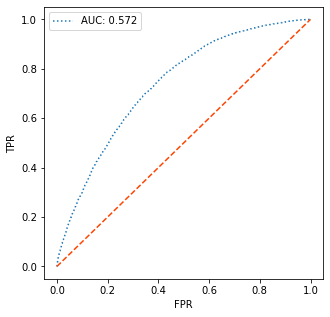

In [137]:
# Cretaing AUC Plots
plot1=auc_plot(X_train,X_test,y_train,y_test,gb1,"AUC: ")
plt.xlabel('FPR')
plt.ylabel('TPR')

This blue curve is an ROC curve which summarises all the confusion matrices that each threshold produced. Any point which exists on the red dotted line represents that the True Positive Rate = True Negative Rate,which means the proportion of correctly classified members who RENEW is same as the proportion of incorrectly classified members who do not RENEW

#### Using this model, we got accuracy of 62% with AUC value of 0.572. Let's see if we can improve this by tuning the model.

#### Now, lets try removing the variable MBRCOUNT and see the result

<h3>Model2</h3>

In [138]:
# Assigning a new dataset
df_member_nb2=df_member_nb1

In [139]:
#Removing the predictors with no correlation with RENEW
df_member_nb2 = df_member_nb2.drop(['MBRCOUNT'], axis=1)

In [140]:
#Splitting ratio 70-30

df_member_nb2['RENEW'] = df_member_nb2['RENEW'].astype(int)
X = df_member_nb2.drop(labels = ['RENEW'], axis = 1)
y = df_member_nb2['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [141]:
#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
# Initializing the Guassian Naive Bayes Classifier
gb2 = GaussianNB()

In [143]:
#Predicting the Test set results
gb2.fit(X_train, y_train)
y_pred = gb2.predict(X_test)

In [144]:
#Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[18322,  1067],
       [12010,  2942]], dtype=int64)

In [145]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.94      0.74     19389
           1       0.73      0.20      0.31     14952

    accuracy                           0.62     34341
   macro avg       0.67      0.57      0.52     34341
weighted avg       0.66      0.62      0.55     34341



In [146]:
#Printing the prediction accuracy
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0))

Accuracy: 61.92%


Text(0, 0.5, 'TPR')

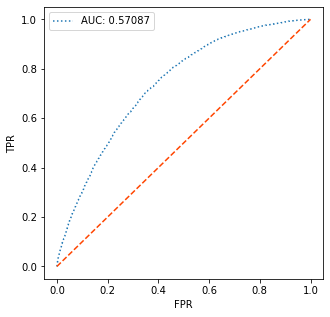

In [148]:
# Cretaing AUC Plots
plot2=auc_plot(X_train,X_test,y_train,y_test,gb2,"AUC: ")
plt.xlabel('FPR')
plt.ylabel('TPR')

This blue curve is an ROC curve which summarises all the confusion matrices that each threshold produced. Any point which exists on the red dotted line represents that the True Positive Rate = True Negative Rate,which means the proportion of correctly classified members who RENEW is same as the proportion of incorrectly classified members who do not RENEW

#### This model gives us an accuracy of 61.92% which is very little variation from the first model. Let's try tuning this again

#### Now lets try removing another two variables that has less correlation with RENEW

<h3>Model3</h3>

In [149]:
#Removing the predictors with no correlation with RENEW
df_member_nb3=df_member_nb1
df_member_nb3 = df_member_nb3.drop(['GROCERYSHOP','RECENTMOVING_Y'], axis=1)

In [150]:
#Splitting ratio 70-30

df_member_nb3['RENEW'] = df_member_nb3['RENEW'].astype(int)
X = df_member_nb3.drop(labels = ['RENEW'], axis = 1)
y = df_member_nb3['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [151]:
#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
#Initializing the Guassian Naive Bayes Classifier
gb3 = GaussianNB()

In [153]:
#Predicting the Test set results
gb3.fit(X_train, y_train)
y_pred = gb3.predict(X_test)

In [154]:
#Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[18336,  1053],
       [12011,  2941]], dtype=int64)

In [155]:
#Printing the prediction accuracy
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0))

Accuracy: 61.96%


In [156]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.95      0.74     19389
           1       0.74      0.20      0.31     14952

    accuracy                           0.62     34341
   macro avg       0.67      0.57      0.52     34341
weighted avg       0.66      0.62      0.55     34341



Text(0, 0.5, 'TPR')

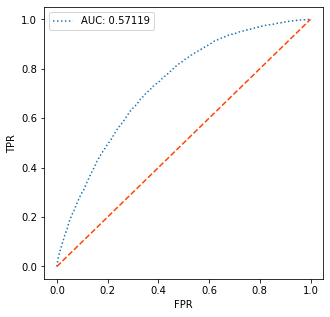

In [158]:
# Cretaing AUC Plots
plot3=auc_plot(X_train,X_test,y_train,y_test,gb3,"AUC: ")
plt.xlabel('FPR')
plt.ylabel('TPR')

This blue curve is an ROC curve which summarises all the confusion matrices that each threshold produced. Any point which exists on the red dotted line represents that the True Positive Rate = True Negative Rate,which means the proportion of correctly classified members who RENEW is same as the proportion of incorrectly classified members who do not RENEW

#### Here, we can see that the above 3 models are giving almost the same accuracy values. Lets go ahead and find out the mean accuarcy for a kfold validation with 10 folds

#### Using this third model, we are getting an accuracy of 61.96%.The three models are not showing much variation in terms of accuracy. Lets try using k-fold validation on the first model and see if there is any change with the accuracy.

<h3>K-fold validation:</h3>

In [159]:
#Splitting ratio 70-30

df_member_nb1['RENEW'] = df_member_nb1['RENEW'].astype(int)
X = df_member_nb1.drop(labels = ['RENEW'], axis = 1)
y = df_member_nb1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [160]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
# K-fold validation
accuracies = cross_val_score(gb2,X_train,y_train,cv=10)
print("Accuracy: %.2f%%" % (accuracies.mean()*100.0)) 

Accuracy: 61.91%


<h1>Support Vector Machine(linear)</h1>

#### Now, let us try SVM(linear) algorithm in our preprocessed dataset.

<h3>Model1</h3>

In [163]:
#Removing the predictors with no correlation with RENEW
df_member_sv1=df_member

#Splitting ratio 70-30
df_member_sv1['RENEW'] = df_member_sv1['RENEW'].astype(int)
 
X = df_member_sv1.drop(labels = ['RENEW'], axis = 1)
y = df_member_sv1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
# Initializing SVM classifier
classifier1 = SVC(kernel = 'linear', random_state = 101)
classifier1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [165]:
# Predicting the values
y_pred = classifier1.predict(X_test)

#Printing the prediction accuracy
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0))

Accuracy: 70.45%


In [166]:
#Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[15765,  3624],
       [ 6523,  8429]], dtype=int64)

In [167]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76     19389
           1       0.70      0.56      0.62     14952

    accuracy                           0.70     34341
   macro avg       0.70      0.69      0.69     34341
weighted avg       0.70      0.70      0.70     34341



#### Using the above model, we are getting an accuracy of 70.45%. Let's try tuning the model.

<h3>Model2</h3>

#### Now, lets try removing the variable MBRCOUNT and see the result

In [169]:
#Removing the predictors with no correlation with RENEW
df_member_sv2=df_member
df_member_sv2=df_member_sv2.drop(['MBRCOUNT'], axis=1)

#Splitting ratio 70-30
df_member_sv2['RENEW'] = df_member_sv2['RENEW'].astype(int)
X = df_member_sv2.drop(labels = ['RENEW'], axis = 1)
y = df_member_sv2['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [170]:
# Initializing SVM classifier
classifier2 = SVC(kernel = 'linear', random_state = 101)
classifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [171]:
#Predicting the values
y_pred = classifier2.predict(X_test)

#Printing the prediction accuracy
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0))

Accuracy: 70.48%


In [172]:
#Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[15765,  3624],
       [ 6515,  8437]], dtype=int64)

In [173]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76     19389
           1       0.70      0.56      0.62     14952

    accuracy                           0.70     34341
   macro avg       0.70      0.69      0.69     34341
weighted avg       0.70      0.70      0.70     34341



#### We are getting almost the same accuracy as the above model. So, let's move ahead with the first model itself

<h1>Support Vector Machine(rbf)</h1>

<h3>Model1</h3>

In [175]:
#Removing the predictors with no correlation with RENEW
df_member_sv1=df_member

#Splitting ratio 70-30

df_member_sv1['RENEW'] = df_member_sv1['RENEW'].astype(int)
X = df_member_sv1.drop(labels = ['RENEW'], axis = 1)
y = df_member_sv1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
classifier3 = SVC(kernel = 'rbf', random_state = 101)
classifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [177]:
#Predicting the values
y_pred = classifier3.predict(X_test)

#Printing the prediction accuracy
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0))

Accuracy: 70.95%


In [178]:
#Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[15114,  4275],
       [ 5701,  9251]], dtype=int64)

In [179]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     19389
           1       0.68      0.62      0.65     14952

    accuracy                           0.71     34341
   macro avg       0.71      0.70      0.70     34341
weighted avg       0.71      0.71      0.71     34341



#### Using radial kernel SVM, we are getting a slighlt better accuracy than the linear model. The accuracy that we got using RBF is 70.95% . Since SVM radial kernel is non parametric, tuning the model doesnt impact the result much. So, let's conclude that out of the four models used in SVM(linear as well as rbf) we can go ahead with the SVM radial kernel.

<h1>Random Forest</h1>

Let's now proceed with Random Forest. First, we can consider our original preprocessed dataset.

<h3>Model1</h3>

In [183]:
# Initializing the dataset
df_member_rf1=df_member

#Splitting ratio 70-30

df_member_rf1['RENEW'] = df_member_rf1['RENEW'].astype(int)
X = df_member_rf1.drop(labels = ['RENEW'], axis = 1)
y = df_member_rf1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
# Random Forest Implementation
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=101)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

<h3> Randomized Search Cross Validation</h3>

We can try randomized search cross validation using number of trees upto 500

In [185]:
# RandomizedSearch Cross Validation
parameters=[{'n_estimators': [10,20,30,40,50,100, 150,200,250, 300, 350,400,450,500],
             'max_depth':[3,5,10,None],
               'criterion':['gini','entropy']}]
rdmsearch = RandomizedSearchCV(rf, param_distributions=parameters,
                                  n_jobs=-1,cv=10)
#CV = Cross-Validation ( here using Stratified KFold CV)
rdmsearch.fit(X_train,y_train)
ht_params = rdmsearch.best_params_
ht_score = rdmsearch.best_score_

In [186]:
ht_params

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}

In [187]:
ht_score

0.7172683910612305

We can try randomized search cross validation using number of trees upto 250

In [188]:
parameters=[{'n_estimators': [10,20,30,40,50,100, 150,200,250],
            'max_depth':[3,5,10,20,25,30,35,40,45,50],
               'criterion':['gini','entropy']}]
rdmsearch = RandomizedSearchCV(rf, param_distributions=parameters,
                                  n_jobs=-1,cv=10)
#CV = Cross-Validation ( here using Stratified KFold CV)
rdmsearch.fit(X_train,y_train)
ht_params = rdmsearch.best_params_
ht_score = rdmsearch.best_score_

In [189]:
ht_params


{'n_estimators': 150, 'max_depth': 20, 'criterion': 'entropy'}

In [190]:
ht_score

0.7182793667978002

Here, we can see that number of trees equal to 500 and 250 doesn't have much difference. Let us go ahead with 250( as 500 can lead to overfitting also).

In [191]:
# Random Forest Implementation
rf=RandomForestClassifier(n_estimators=250,criterion='entropy',max_depth=20,random_state=101)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [192]:
# Predicting the values
y_pred = rf.predict(X_test)

# Printing the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.720974927928715


In [193]:
# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[15069,  4320],
       [ 5262,  9690]], dtype=int64)

In [194]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     19389
           1       0.69      0.65      0.67     14952

    accuracy                           0.72     34341
   macro avg       0.72      0.71      0.71     34341
weighted avg       0.72      0.72      0.72     34341



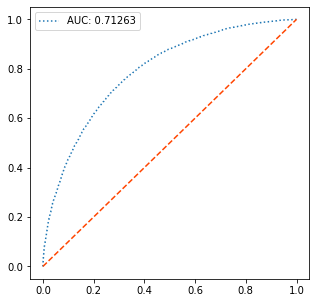

In [196]:
# Cretaing AUC Plots
plot1=auc_plot(X_train,X_test,y_train,y_test,rf,"AUC: ")

#### Using this model, we are getting an accuracy of 72.09%. Let's fine tune it and see the result.

<h3>Model2</h3>

Let's remove additional predictors with no correlation to RENEW

In [197]:
#Removing the predictors with no correlation with RENEW
df_member_rf2=df_member
df_member_rf2=df_member_rf2.drop(['GROCERYSHOP','RECENTMOVING_Y'], axis=1)

#Splitting ratio 70-30

df_member_rf2['RENEW'] = df_member_rf2['RENEW'].astype(int)
X = df_member_rf2.drop(labels = ['RENEW'], axis = 1)
y = df_member_rf2['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [198]:
# Random Forest Implementation
rf2=RandomForestClassifier(n_estimators=250,criterion='entropy',max_depth=20,random_state=101)
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [199]:
#Predicting the values
y_pred = rf2.predict(X_test)

#Printing the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.721295244751172


In [200]:
#Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[15001,  4388],
       [ 5183,  9769]], dtype=int64)

In [201]:
#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     19389
           1       0.69      0.65      0.67     14952

    accuracy                           0.72     34341
   macro avg       0.72      0.71      0.71     34341
weighted avg       0.72      0.72      0.72     34341



Feature: 0, Score: 0.01097
Feature: 1, Score: 0.00016
Feature: 2, Score: 0.02703
Feature: 3, Score: 0.20745
Feature: 4, Score: 0.47631
Feature: 5, Score: 0.03534
Feature: 6, Score: 0.08665
Feature: 7, Score: 0.10131
Feature: 8, Score: 0.01302
Feature: 9, Score: 0.02428
Feature: 10, Score: 0.01749


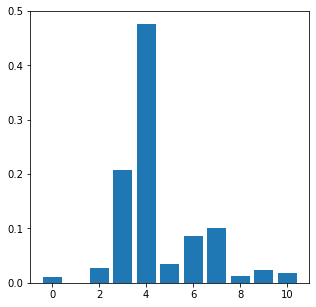

In [203]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

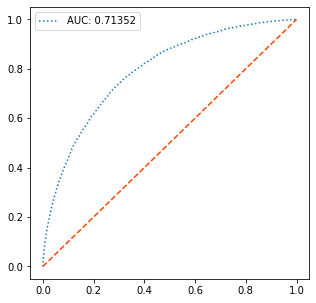

In [204]:
# Cretaing AUC Plots
plot2=auc_plot(X_train,X_test,y_train,y_test,rf2,"AUC: ")

#### This model gives a slightly better value of 72.19%. So let's consider this model only.

# Extratrees Classifier

In [206]:
df_member_et1=df_member
#Splitting ratio 70-30

**We got the data ready. Let's go ahead and create train and test splits**

In [207]:
df_member_et1['RENEW'] = df_member_et1['RENEW']
X = df_member_et1.drop(labels = ['RENEW'], axis = 1)
y = df_member_et1['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


**We have our train and test splits ready. Let's fit the Extratrees classifier**

In [208]:
etclf = ExtraTreesClassifier()
etclf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

**The Extratree Classifier is fitted on our training data. Above are the parameters chosen for the classifier. Let's predict the membership churn on our test data and find out how accurate our prediction is**

In [209]:
predictions = etclf.predict(X_test)
conf_matrix=confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)

In [210]:
accuracy

0.6925540898634286

**We got ~69% accuracy with Extratrees classifier. Let's look at the confusion Matrix and other classification metrics**

In [211]:
conf_matrix

array([[14221,  5069],
       [ 5489,  9562]], dtype=int64)

In [212]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     19290
           1       0.65      0.64      0.64     15051

    accuracy                           0.69     34341
   macro avg       0.69      0.69      0.69     34341
weighted avg       0.69      0.69      0.69     34341



**Above are the classification metrics. Let's see if we can improve them by performing hyperparameter tuning. For the tuning, we are considering**

**max_depth = 3,5,10,None <br>
max_features = 1,2,3 <br>
criterion = gini or entropy <br>
min_samples_leaf = 1,2,3,4 <br>
min_samples_split = 1,2,3,4** 

### Hyperparameter Tuning for Extratree Classifier

In [213]:
est = ExtraTreesClassifier()
et_p_dist={'max_depth':[3,5,10,None],
              'max_features':[1,2,3,4,5,6,7,8,9,10],
               'criterion':['gini','entropy'],
               'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
               'min_samples_split':[1,2,3,4,5,6,7,8,9,10],
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [214]:
et_parameters, et_ht_score = hypertuning_rscv(est, et_p_dist, 100, X, y)

In [215]:
et_ht_score

0.7067179901419233

 **The accuracy is improved from 0.69 to 0.7 which is not much improvement in accuracy <br>
Going ahead with change in data preprocessing <br>
Removing MBRCOUNT <br>
Then, going ahead with the model**

## Extratrees Classifier - Model 2

In [216]:
df_member_et2=df_member
df_member_et2['RENEW'] = df_member_et2['RENEW']
X = df_member_et2.drop(labels = ['RENEW'], axis = 1)
y = df_member_et2['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Dropping Column 'MBRCOUNT'
df_member_et2.drop(['MBRCOUNT'], axis=1, inplace=True)

#creating dummy variables
df_member_et2 = pd.get_dummies(df_member_et2, drop_first=True)

df_member_et2.head()

,RENEW,A2ACCTYP,TENURE,EARLYFAREWELL,SHOP6M,ECOMSHOP,GASSHOP,MEDICALSHOP,GROCERYSHOP,M2EXCFLG_E,HOMEFCTYCHANGE_Y,RECENTMOVING_Y,AGE GROUP_Senior
0,0,1,1,75,827.710022,0.0,0.0293,0.01730,0.522668,0,1,0,0
1,0,1,1,320,0.000000,1.0,0.0000,0.00000,0.000000,0,0,0,1
2,0,1,1,350,0.000000,0.0,0.0000,0.30377,0.234103,0,0,0,0
3,0,1,1,137,23.230000,0.0,0.0251,0.00000,0.405492,0,0,0,0
4,0,1,1,41,72.959999,0.0,0.0000,0.00818,0.935876,1,0,0,0


**We got the data ready. Let's go ahead and create train and test splits**

In [217]:
df_member_et2['RENEW'] = df_member_et2['RENEW'].astype(int)
X = df_member_et2.drop(labels = ['RENEW'], axis = 1)
y = df_member_et2['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**We have our train and test splits ready. Let's fit the Extratrees classifier**

In [218]:
etclf2 = ExtraTreesClassifier()
etclf2.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

**The Extratree Classifier is fitted on our training data. Above are the parameters chosen for the classifier. Let's predict the membership churn on our test data and find out how accurate our prediction is**

In [219]:
predictions = etclf2.predict(X_test)
conf_matrix=confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)

In [220]:
accuracy

0.6844588101686031

**We got 68.44% accuracy for this model.**

In [221]:
conf_matrix

array([[14184,  5205],
       [ 5631,  9321]], dtype=int64)

In [222]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     19389
           1       0.64      0.62      0.63     14952

    accuracy                           0.68     34341
   macro avg       0.68      0.68      0.68     34341
weighted avg       0.68      0.68      0.68     34341



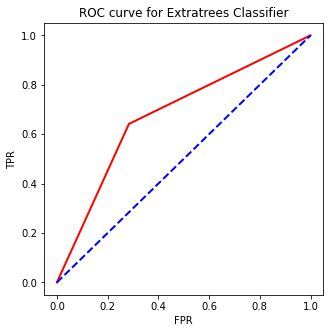

In [223]:
##Computing false and true positive rates
fpr, tpr, _ = roc_curve(etclf2.predict(X_test), y_test, drop_intermediate=False)

plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Extratrees Classifier')
plt.show()

In [224]:
roc_auc_score(etclf2.predict(X_test), y_test)

0.6787491702210753

**From the learnings of Pycaret module, we got to learn that Gradient Boosting Classifier has also high accuracy. Let's check out if Gradient Boosting classifier can have more accuracy for the above data** 

## Gradient Boosting Classifier

**Fitting Gradient Boosting Classifier on our train and test splits created earlier**

In [225]:
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**The Gradient Boosting Classifier is fitted on our training data. Above are the parameters chosen for the classifier. Let's predict the membership churn on our test data and find out how accurate our prediction is**

In [226]:
predictions = gbclf.predict(X_test)
conf_matrix=confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)

In [227]:
accuracy

0.7193733438164294

**We got 72% accuracy for Gradient Boosting Classifier. We got higher accuracy than Extratrees Classifier. Let's go ahead and look at the confusion matrix and classification metrics**

In [228]:
conf_matrix

array([[14965,  4424],
       [ 5213,  9739]], dtype=int64)

In [229]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     19389
           1       0.69      0.65      0.67     14952

    accuracy                           0.72     34341
   macro avg       0.71      0.71      0.71     34341
weighted avg       0.72      0.72      0.72     34341



**Above are the classification metrics. Let's see if we can improve them by performing hyperparameter tuning. For the tuning, we are considering**

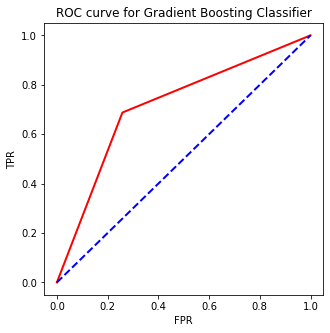

In [230]:
##Computing false and true positive rates
fpr, tpr, _ = roc_curve(gbclf.predict(X_test), y_test, drop_intermediate=False)

plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Gradient Boosting Classifier')
plt.show()

In [231]:
roc_auc_score(gbclf.predict(X_test), y_test)

0.7146430605778451

### Hyperparamter Tuning for Gradient Boosting

In [232]:
est = GradientBoostingClassifier()
gb_p_dist={'max_depth':range(5,16,2),
              'max_features':range(7,20,2),
               'n_estimators':range(20,81,10),
               'min_samples_leaf':range(30,71,10),
               'min_samples_split':range(200,1001,200)
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [233]:
gb_parameters, gb_ht_score = hypertuning_rscv(est, gb_p_dist, 100, X, y)

In [234]:
gb_parameters

{'n_estimators': 30,
 'min_samples_split': 200,
 'min_samples_leaf': 40,
 'max_features': 7,
 'max_depth': 5}

In [235]:
gb_ht_score

0.7126147137907692

**We see a reduction in the accuracy, which is not good for the model. For now, gardient boosting classifier is the best model we have. For an instance, let's try out the basic tree model - Decision Tree Model**

## Decision Tree Classifier

**Fitting decision tree classifier on our train and test splits created earlier**

In [236]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**The Decision Tree Classifier is fitted on our training data. Above are the parameters chosen for the classifier. Let's predict the membership churn on our test data and find out how accurate our prediction is**

In [237]:
predictions = dtclf.predict(X_test)
conf_matrix=confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)

In [238]:
accuracy

0.6506799452549431

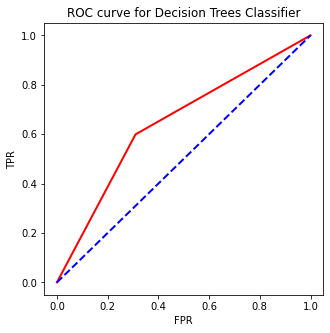

In [239]:
##Computing false and true positive rates
fpr, tpr, _ = roc_curve(dtclf.predict(X_test), y_test, drop_intermediate=False)

plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Decision Trees Classifier')
plt.show()

In [240]:
roc_auc_score(dtclf.predict(X_test), y_test)

0.6446144720823956

**We got 64.59% accuracy for Decision Tree Classifier. But it is less than both Extratrees classifier and Graidient Boosting Machine. This shows that complex models work better for this dataset better than simple model. Let's go ahead and perform hyperparameter tuning for the decision tree classifier to see if there is an improvement in accuracy**

### Hyperparameter Tuning for Decision Tree Classifier

In [241]:
est = DecisionTreeClassifier()
dt_p_dist={'max_depth':[3,5,10,None],
              'max_features':[1,2,3,4,5,6,7,8,9,10],
               'criterion':['gini','entropy'],
               'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [242]:
dt_parameters, dt_ht_score = hypertuning_rscv(est, dt_p_dist, 100, X, y)

In [243]:
dt_ht_score

0.7047261986937707

**We see that the accuracy is improved to 70.47% accuracy. But anyway it is less than both Extratree and Gradient Boosting Classifiers**

**We can conclude that out of the three models (Decision Trees, Gradient Boosting, Extratrees Classifiers) Gradient Boosting classifier works best and produces ~72% accuracy in predicting the membership churn <br> <br>
To be precise, the membership churn prediction is best predicted with Gradient Boosting classifier which is an additive model in a forward stage-wise fashion; which allows for the optimization of arbitrary differentiable loss functions. As this is a binary classification, in each stage one tree is fit on the negative gradient of the binomial or multinomial deviance loss function<br> 
<br>
With Gradient Boosting classifier, we can predict with 72% confidence if a member (can be of any type) of Costco wholesale will renew his/her membership for the next year**

# Stochastic Gradient Descent Classifier

In [244]:
# Initializing the dataset
df_member_sg=df_member

#Splitting ratio 70-30

df_member_sg['RENEW'] = df_member_sg['RENEW'].astype(int)
X = df_member_sg.drop(labels = ['RENEW'], axis = 1)
y = df_member_sg['RENEW'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training and Validation**

In [245]:
clf_SGDC = SGDClassifier(random_state=0)
clf_SGDC.fit(X_train, y_train) 
y_pred_SGDC = clf_SGDC.predict(X_test)

print("Stochastic Gradient Descent Classifier")
print("AUC ROC: {}".format(roc_auc_score(y_test, y_pred_SGDC)))

Stochastic Gradient Descent Classifier
AUC ROC: 0.6815531967497912


**Validation**

In [246]:
print("Accuracy for train dataset: {}".format(clf_SGDC.score(X_train, y_train)))
print("Accuracy for test dataset: {}".format(clf_SGDC.score(X_test, y_test)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_SGDC)))
print("Precision: {}".format(precision_score(y_test, y_pred_SGDC)))
print("Recall: {}".format(recall_score(y_test, y_pred_SGDC)))

# Check ROC AUC with Cross Validation
cross_val_score(clf_SGDC, X_train, y_train, cv=3, scoring="roc_auc")

Accuracy for train dataset: 0.6982241136167929
Accuracy for test dataset: 0.6966890888442386
F1 Score: 0.6183776654209717
Precision: 0.6837627613028683
Recall: 0.5644060995184591


array([0.77376314, 0.77452625, 0.76802053])

#### Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

#### Recall is the ratio of correctly predicted positive observations to all the observations in actual class.

#### F1-Score is the weighted average of Precision and Recall.

Creating the classification report and confusion matrix for the classification metrics.

In [247]:
print('=====================================================')
print('Classification report:')
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_SGDC))
print('=====================================================')
print('Confusion matrix:')
print('-----------------------------------------------------')
print(confusion_matrix(y_test, y_pred_SGDC))
print('=====================================================')

Classification report:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     19389
           1       0.68      0.56      0.62     14952

    accuracy                           0.70     34341
   macro avg       0.69      0.68      0.68     34341
weighted avg       0.70      0.70      0.69     34341

Confusion matrix:
-----------------------------------------------------
[[15486  3903]
 [ 6513  8439]]


#### The performance metrics are quite good for predicting customers who dosen’t churn with precision, recall and F1 score values of 0.70, 0.80,0.75 whereas for the customers who will churn are 0.68,0.57,0.62, which are comparable to what we got in our regression model.

# Neural network

#### Importing the required libraries

#### We used two dense layers with 100 neurons, 100 neurons,50 neurons and 1 neuron with relu and sigmoid as the activation function for the model to learn better. input_dim argument denotes the number of features in the dataset or in other words the number of columns present in the dataset. In between, we used 20% dropouts to reduce overfitting. The dropout layer ensures that we remove a set percentage of the data each time we iterate through the neural network. kernel_constraint is used for scaling of the weights present in the neural network. The last layer is also a dense layer with 1 neuron and sigmoid as the activation function.

In [248]:
model = Sequential()
model.add(Dense(100, input_dim=12, activation='relu', kernel_constraint=maxnorm(4)))
#model.add(Dropout(rate=0.2))
model.add(Dense(100, activation='relu', kernel_constraint=maxnorm(4)))
model.add(Dense(50, activation='relu', kernel_constraint=maxnorm(4)))
#model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

#### Next, we compiled the model using binary_crossentropy as the loss function, adam as the optimizer and accuracy metric to track during training.

In [249]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

#### We trained the model for 10 epochs with a batch size value of 8. One epoch is when an entire dataset is passed forward and backward through the neural network only once. Batch size is the total number of training examples present in a single batch.

In [250]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Train on 80129 samples, validate on 34341 samples
Epoch 1/50
80129/80129 [==============================] - 6s 74us/step - loss: 0.5680 - accuracy: 0.7015 - val_loss: 0.5607 - val_accuracy: 0.7111
Epoch 2/50
80129/80129 [==============================] - 3s 42us/step - loss: 0.5563 - accuracy: 0.7124 - val_loss: 0.5624 - val_accuracy: 0.7057
Epoch 3/50
80129/80129 [==============================] - 3s 34us/step - loss: 0.5535 - accuracy: 0.7142 - val_loss: 0.5583 - val_accuracy: 0.7124
Epoch 4/50
80129/80129 [==============================] - 2s 31us/step - loss: 0.5527 - accuracy: 0.7139 - val_loss: 0.5542 - val_accuracy: 0.7138
Epoch 5/50
80129/80129 [==============================] - 2s 30us/step - loss: 0.5513 - accuracy: 0.7144 - val_loss: 0.5547 - val_accuracy: 0.7144
Epoch 6/50
80129/80129 [==============================] - 2s 27us/step - loss: 0.5504 - accuracy: 0.7156 - val_loss: 0.5558 - val_accuracy: 0.7157
Epoch 7/50
80129/80129 [==============================] - 1s 17us/st

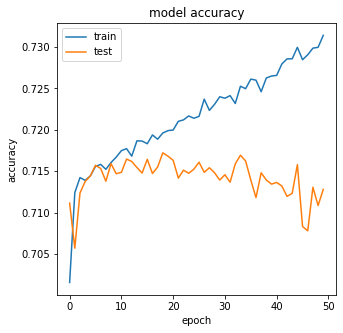

In [251]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

#### The test accuracy of the neural network after 50 epochs is 70.89% .